<font face="Calibri" color="navy" size=8>Methods for Time Series</font>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
!pip install -q statsmodels

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

## Definition

A Time Series is an ordered sequence of values of a variable at equally spaced time intervals.

You can imagine a squence of values:

$$\large x_1, x_2, x_3, \dots x_n, \dots$$

## Scope

What we want is to predict the *future* by using the *past*. In our notation you want to use $x_1$, $x_2$ and so on, up to $x_n$ in order to predict $x_{n+1}.$

## Useful

Sometimes series are correlated, and if we detect the correct correlation we can make useful predictions.

Example:

$$\large y_i = 0.5\cdot x_i -0.2\cdot x_{i-1} +0.1\cdot x_{i-2}$$

If a time series correlates with itself we call it auto-regressive.

In [ ]:
!pip install -q sktime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 34.9 MB/s eta 0:00:00


In [ ]:
import sktime
from sktime import datasets
y=datasets.load_airline()

NaiveForecaster()

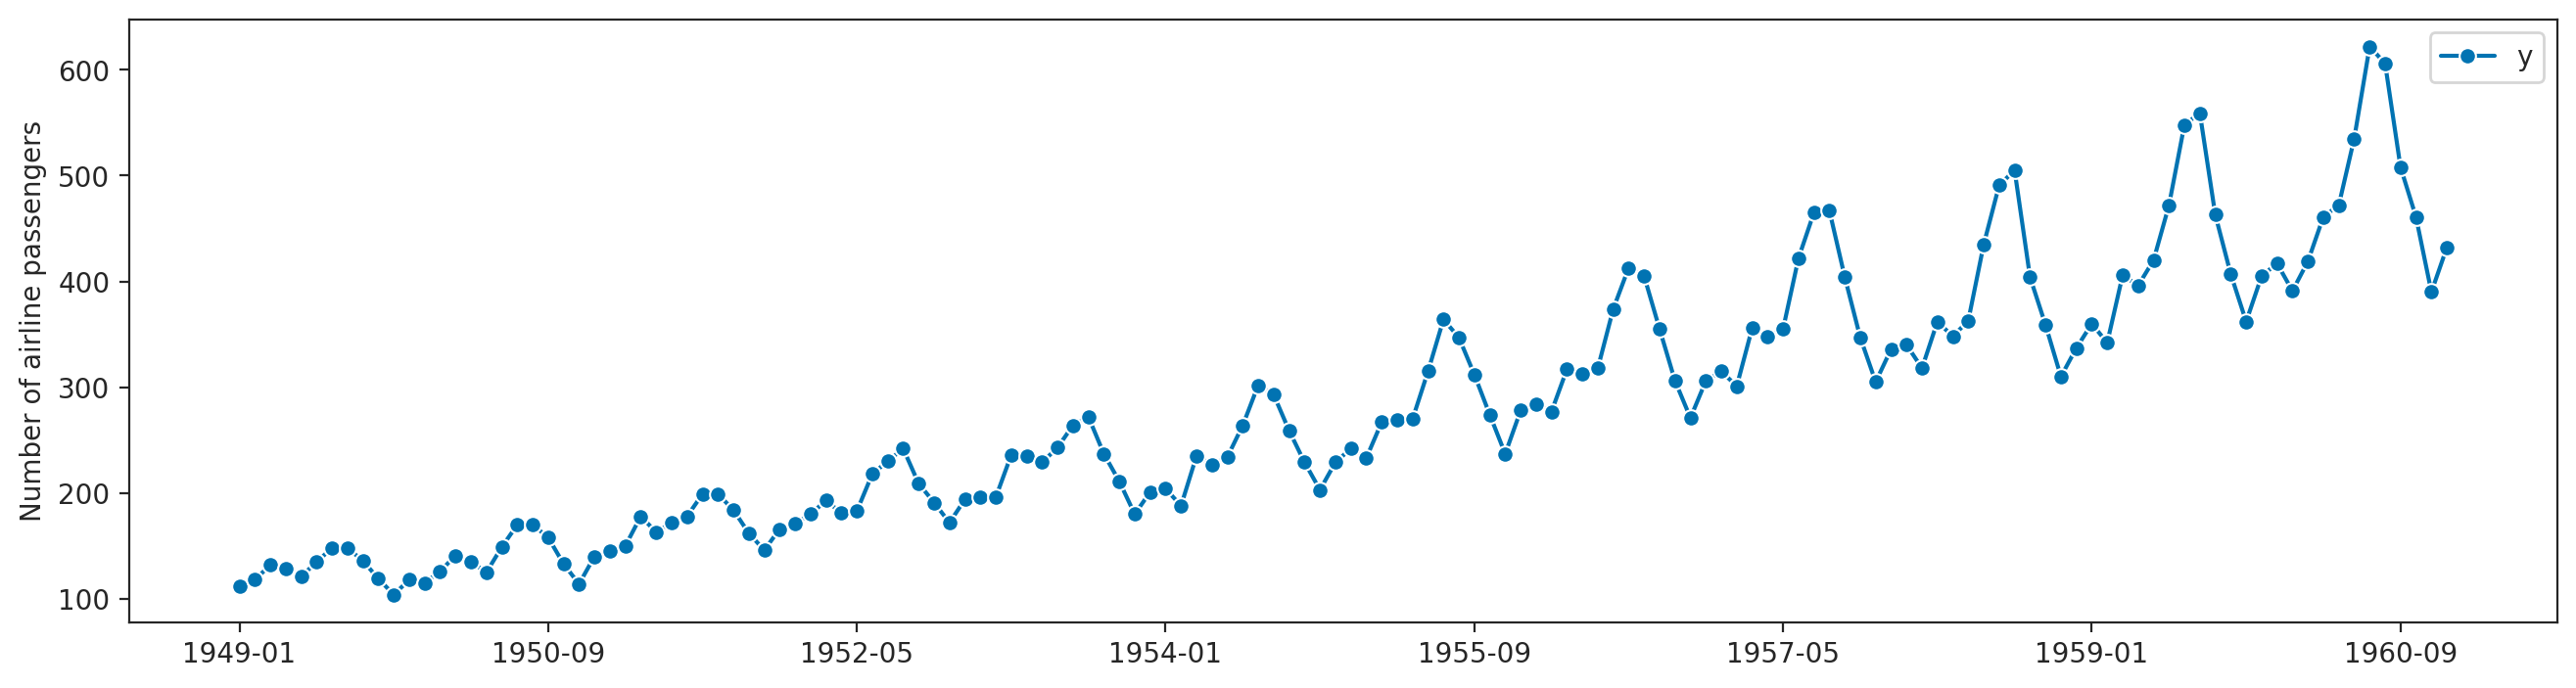

In [ ]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.naive import NaiveForecaster

# Get our airline data:

plot_series(y, labels=["y"])

# Instantiate:
forecaster = NaiveForecaster()

# Fit:
forecaster.fit(y)

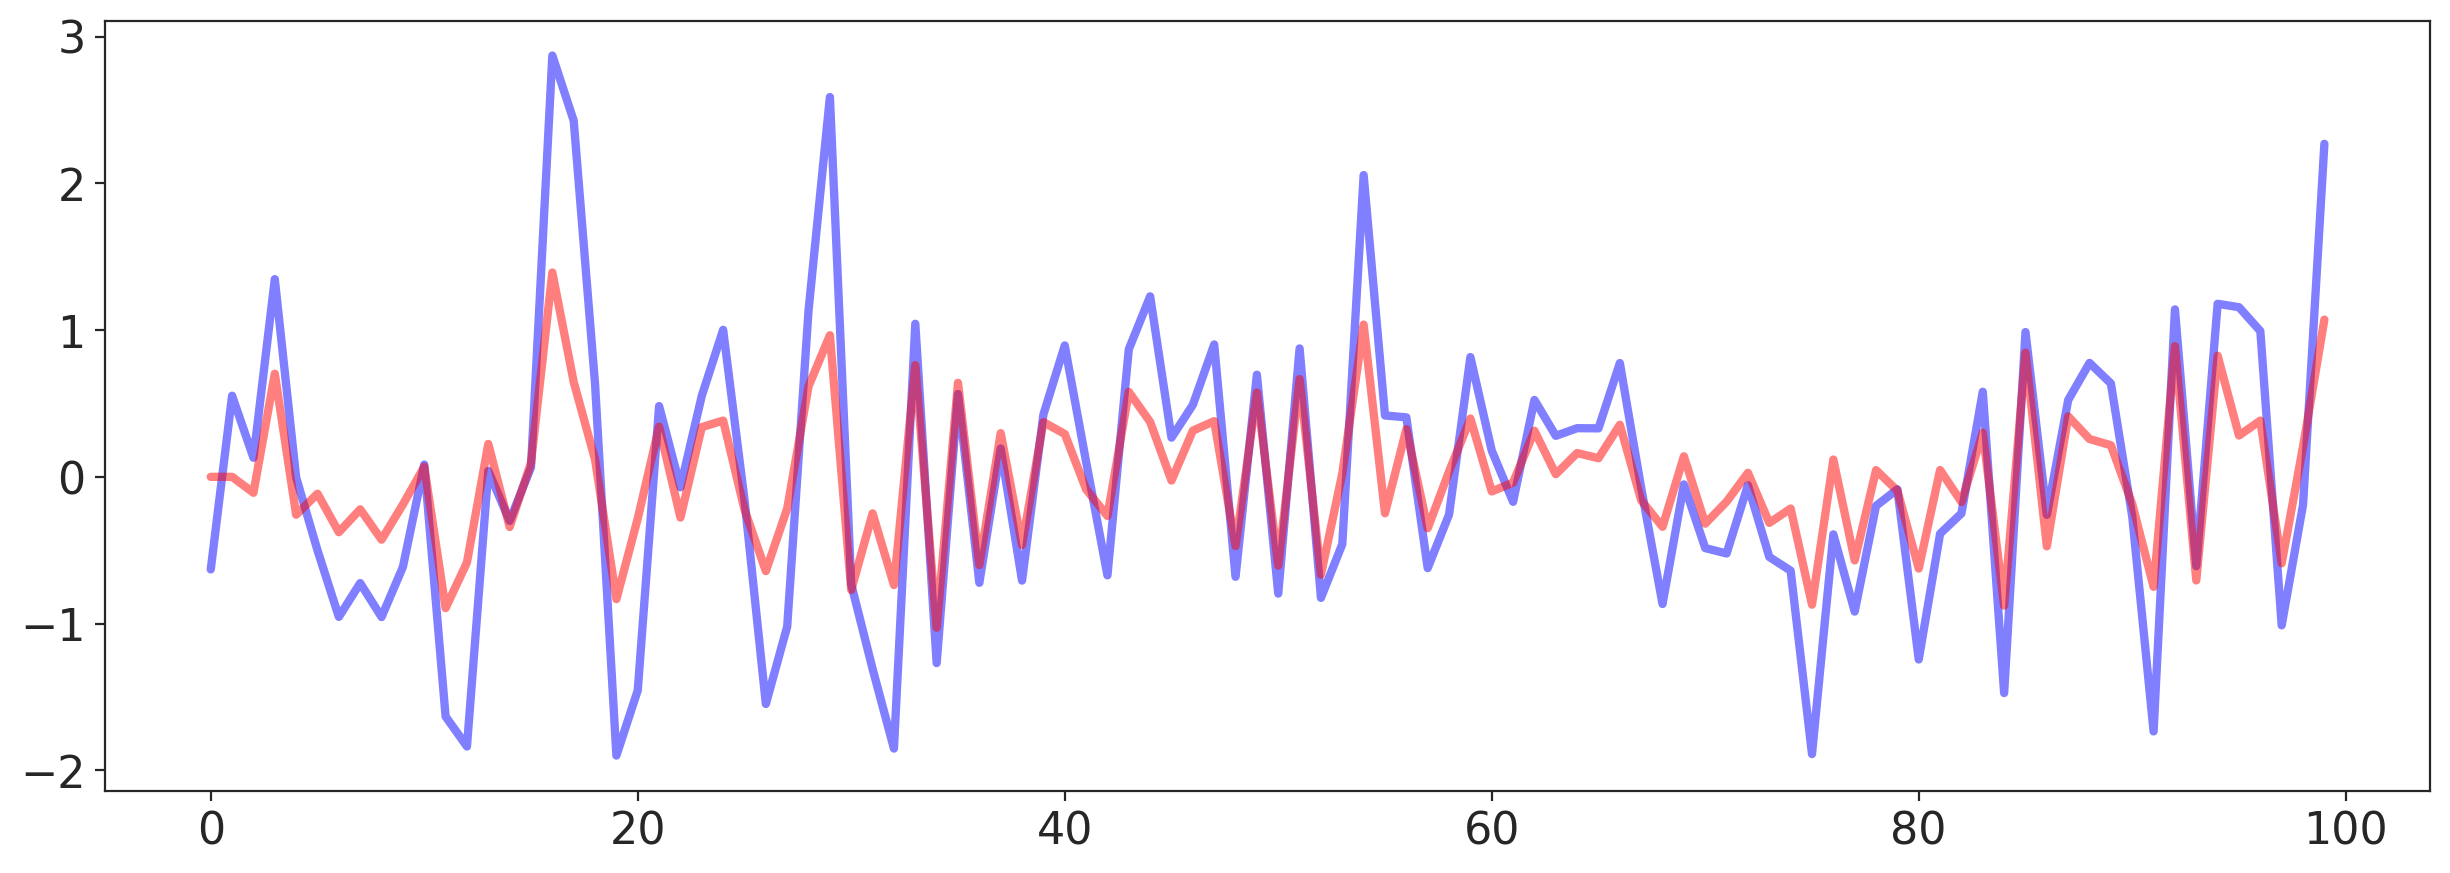

In [ ]:
N = 100
x = np.random.randn(N)

# linear temporal dependency - we generate linearly correlated series saved as y
# the idea is to simulate an auto-regressive time series
y = np.zeros(N)
for i in range(2, N):
    y[i] = 0.5 * x[i] - 0.2 * x[i-1] + 0.1 * x[i-2]

font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(15,5))
plt.plot(x,lw=3,color='blue',alpha=0.5)
plt.plot(y,lw=3,color='red',alpha=0.5)
plt.show()

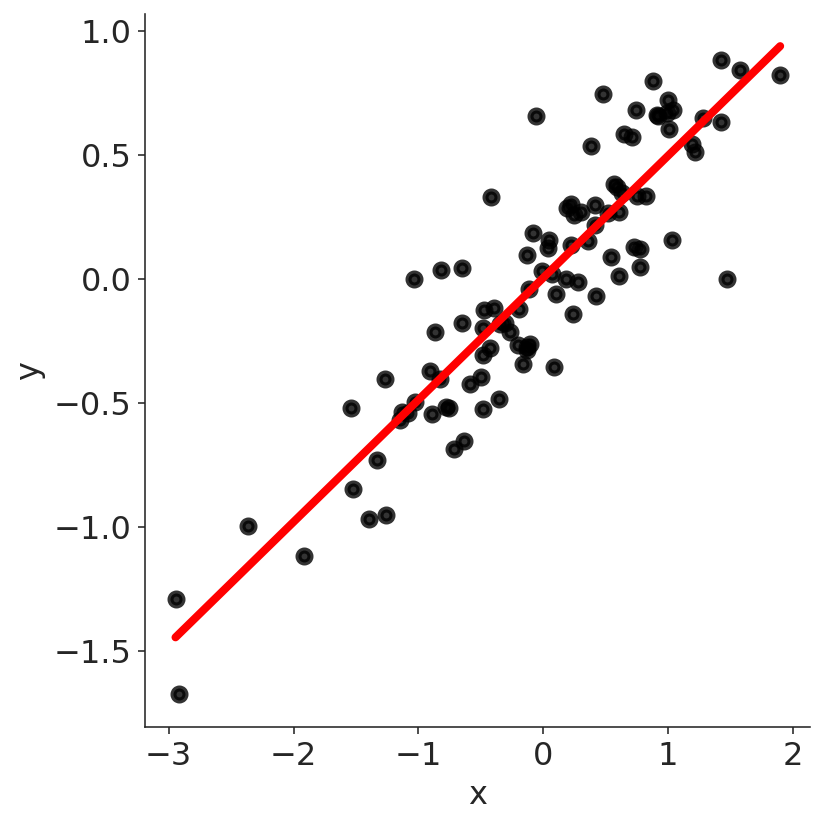

In [ ]:
sns.lmplot(x='x',y='y',data=pd.DataFrame({'x':x,'y':y}),ci=None,scatter_kws={'color':'black','lw':3},line_kws={'color':'red','lw':4},height=6)
plt.show()

## Example of Nonlinear Dependency

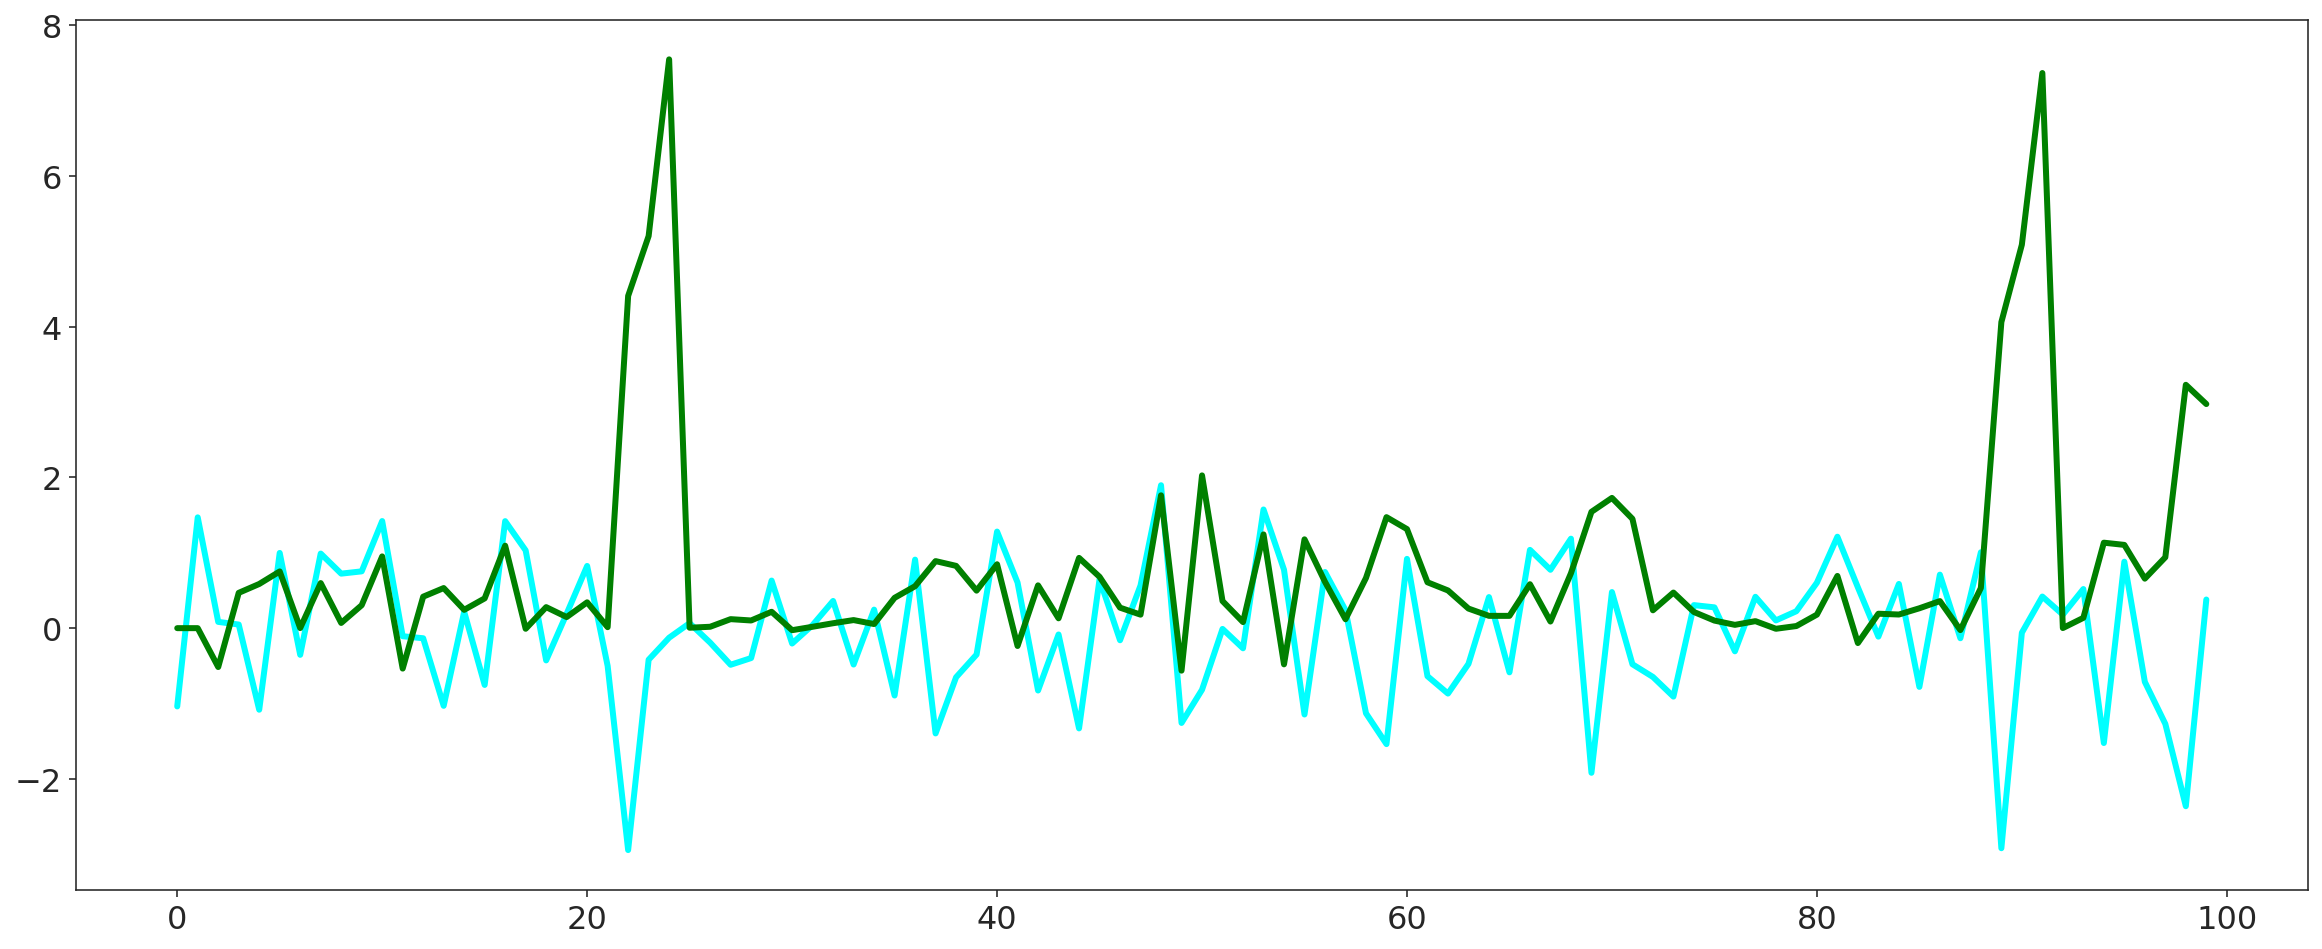

In [ ]:
u = np.zeros(N)
for i in range(2, N):
    u[i] = 0.5 * x[i] ** 2 - 0.2 * x[i-1] ** 3 + 0.1 * x[i-2] ** 4

font_size = 16
plt.rc('font', size=font_size)
plt.rc('axes', titlesize=font_size)
plt.figure(figsize=(20,8))
plt.plot(x,lw=3,color='cyan')
plt.plot(u,lw=3,color='green')
plt.show()

## Autoregressive Models


**Time Series Data:** observations of a random variable at different points in time. The data values are indexed in time order, for example:
$$\large{
y_{t_1}, y_{t_2}, y_{t_3},... y_{t_n}}
$$
We can also *see* the data in retrospect:

$$\large{
y_{t-n},... y_{t-3},y_{t-2}, y_{t-1},y_{t}}
$$






**Assumptions:**

- Future values depend on the previously occurred ones.

- The data is observed at evenly spaced times, for example daily, weekly, monthly etc.



#### Example of Autoregressive model

$$\large{
y_t = \beta_0+\beta_1 y_{t-1} +\epsilon_{t}}
$$

In this model the response variable in the previous time period becomes the predictor and the errors typically are assumed to be independent and identically distributed.


**The k-th order autoregression AR(k) model** is
$$\large{
y_t = \beta_0+\beta_1 y_{t-1} + \beta_2 y_{t-2} + ... \beta_k y_{t-k} + \epsilon_{t}}
$$


#### ARMA (AutoRegressive - Moving Average) Model

$$\large{
y_t = \beta_0+\beta_1 y_{t-1} + \beta_2 y_{t-2} + ... \beta_k y_{t-k} + \theta_1\epsilon_{t-1} + \theta_2\epsilon_{t-2} + ... \theta_q\epsilon_{t-q}}
$$

The coefficient of correlation between two values in a time series is called the autocorrelation function (ACF), for example :
$$
\mbox{Corr}(y_t,y_{t−k})
$$
where $\text{Corr}$ denotes the Pearson correlation function.

If we assume an **AR(k)** model and we want to filter out the linear infuence of the random variables that lie in between $y_{t-1}$ and $y_{t-(k-1)}$, which requires a transformation on the time series, we obtain the *partial autocorrelation function.*


**Important aspects:**

- *Level*: the average value in the time series
- *Trend*: the increasing or decreasing behavior in the time series.
- *Seasonality*: the repeating cycles, the periodicity in the time series.
- *Noise*: the random variations in the time series.


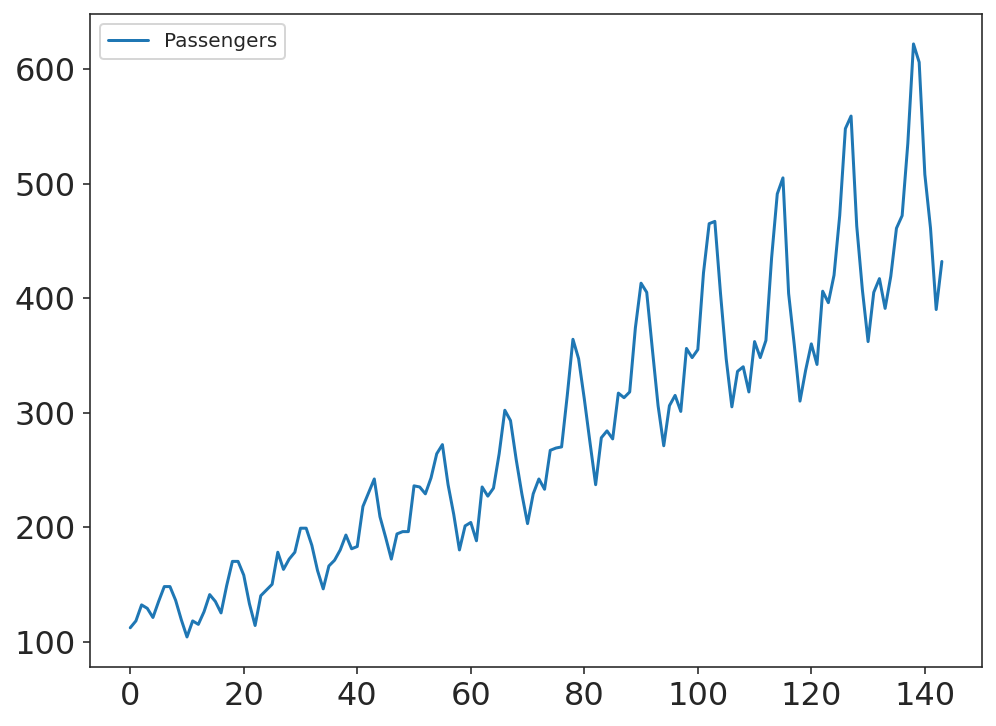

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

series = pd.read_csv('drive/MyDrive/Data Sets/airline-passengers.csv')
series.plot(figsize=(8,6),fontsize=16)
plt.show()

In [ ]:
series

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
series['Month'] = pd.to_datetime(series['Month'])
series

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [ ]:
series = series.set_index('Month')

In [ ]:
series.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
series.loc[series.index < '1954-04-01','Passengers']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1953-11-01    180
1953-12-01    201
1954-01-01    204
1954-02-01    188
1954-03-01    235
Name: Passengers, Length: 63, dtype: int64

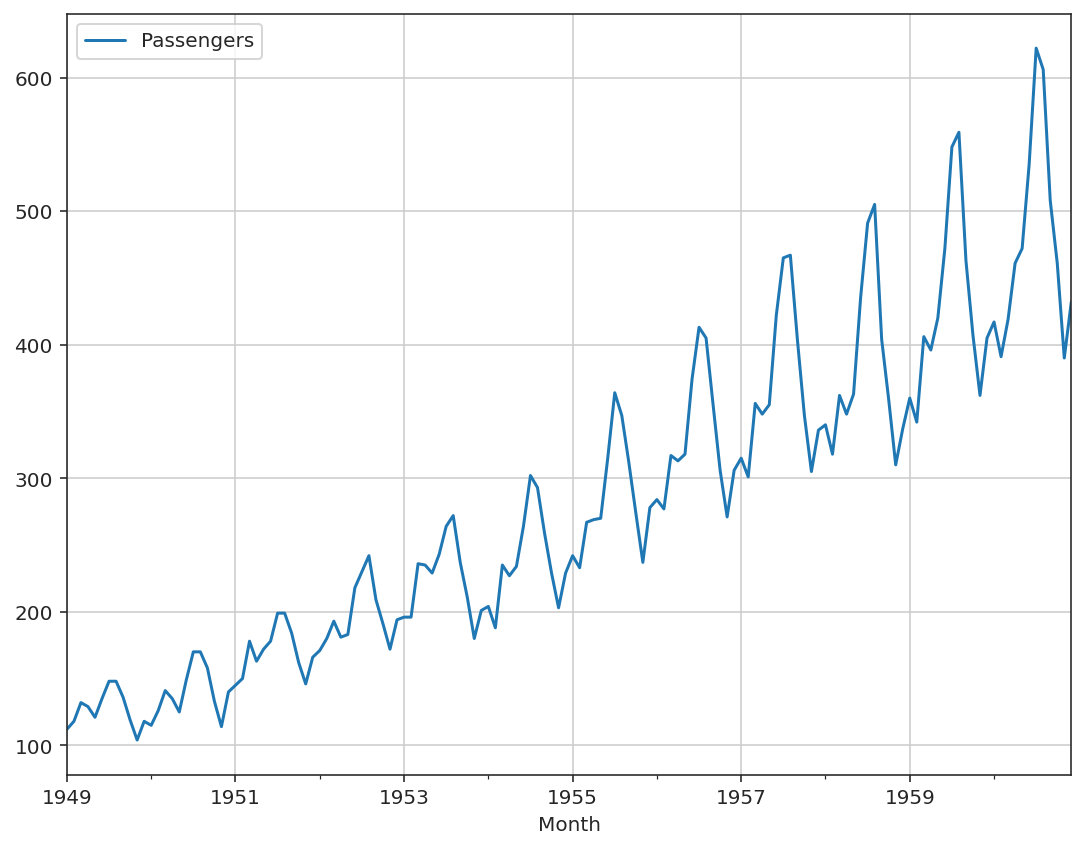

In [ ]:
series.plot(grid=True,figsize=(9,7))
plt.show()

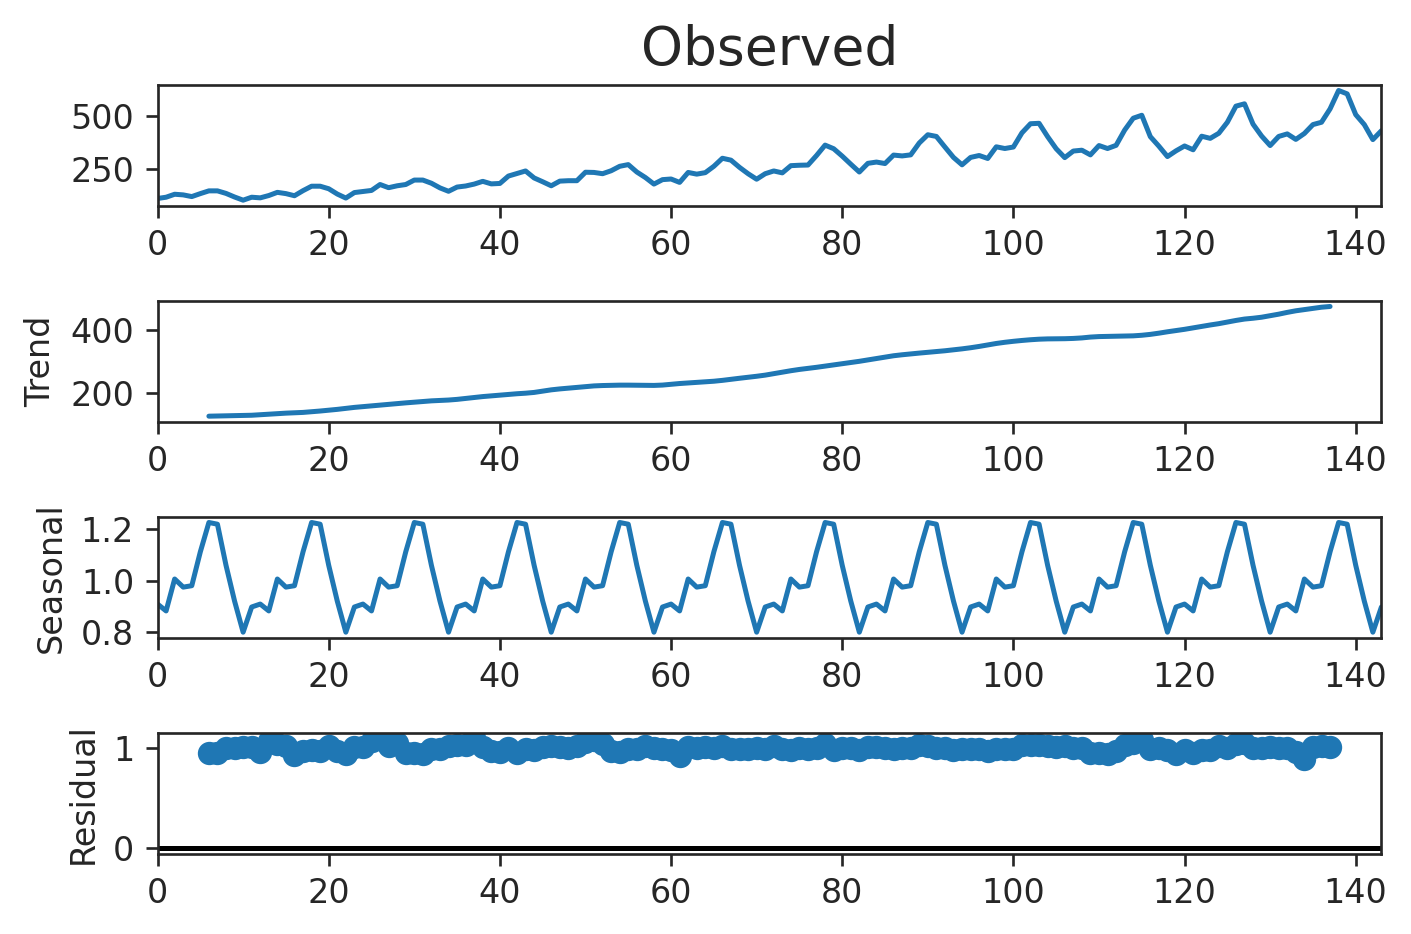

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
result = seasonal_decompose(series['Passengers'].values,model='multiplicative',period=12)
result.plot()
plt.show()

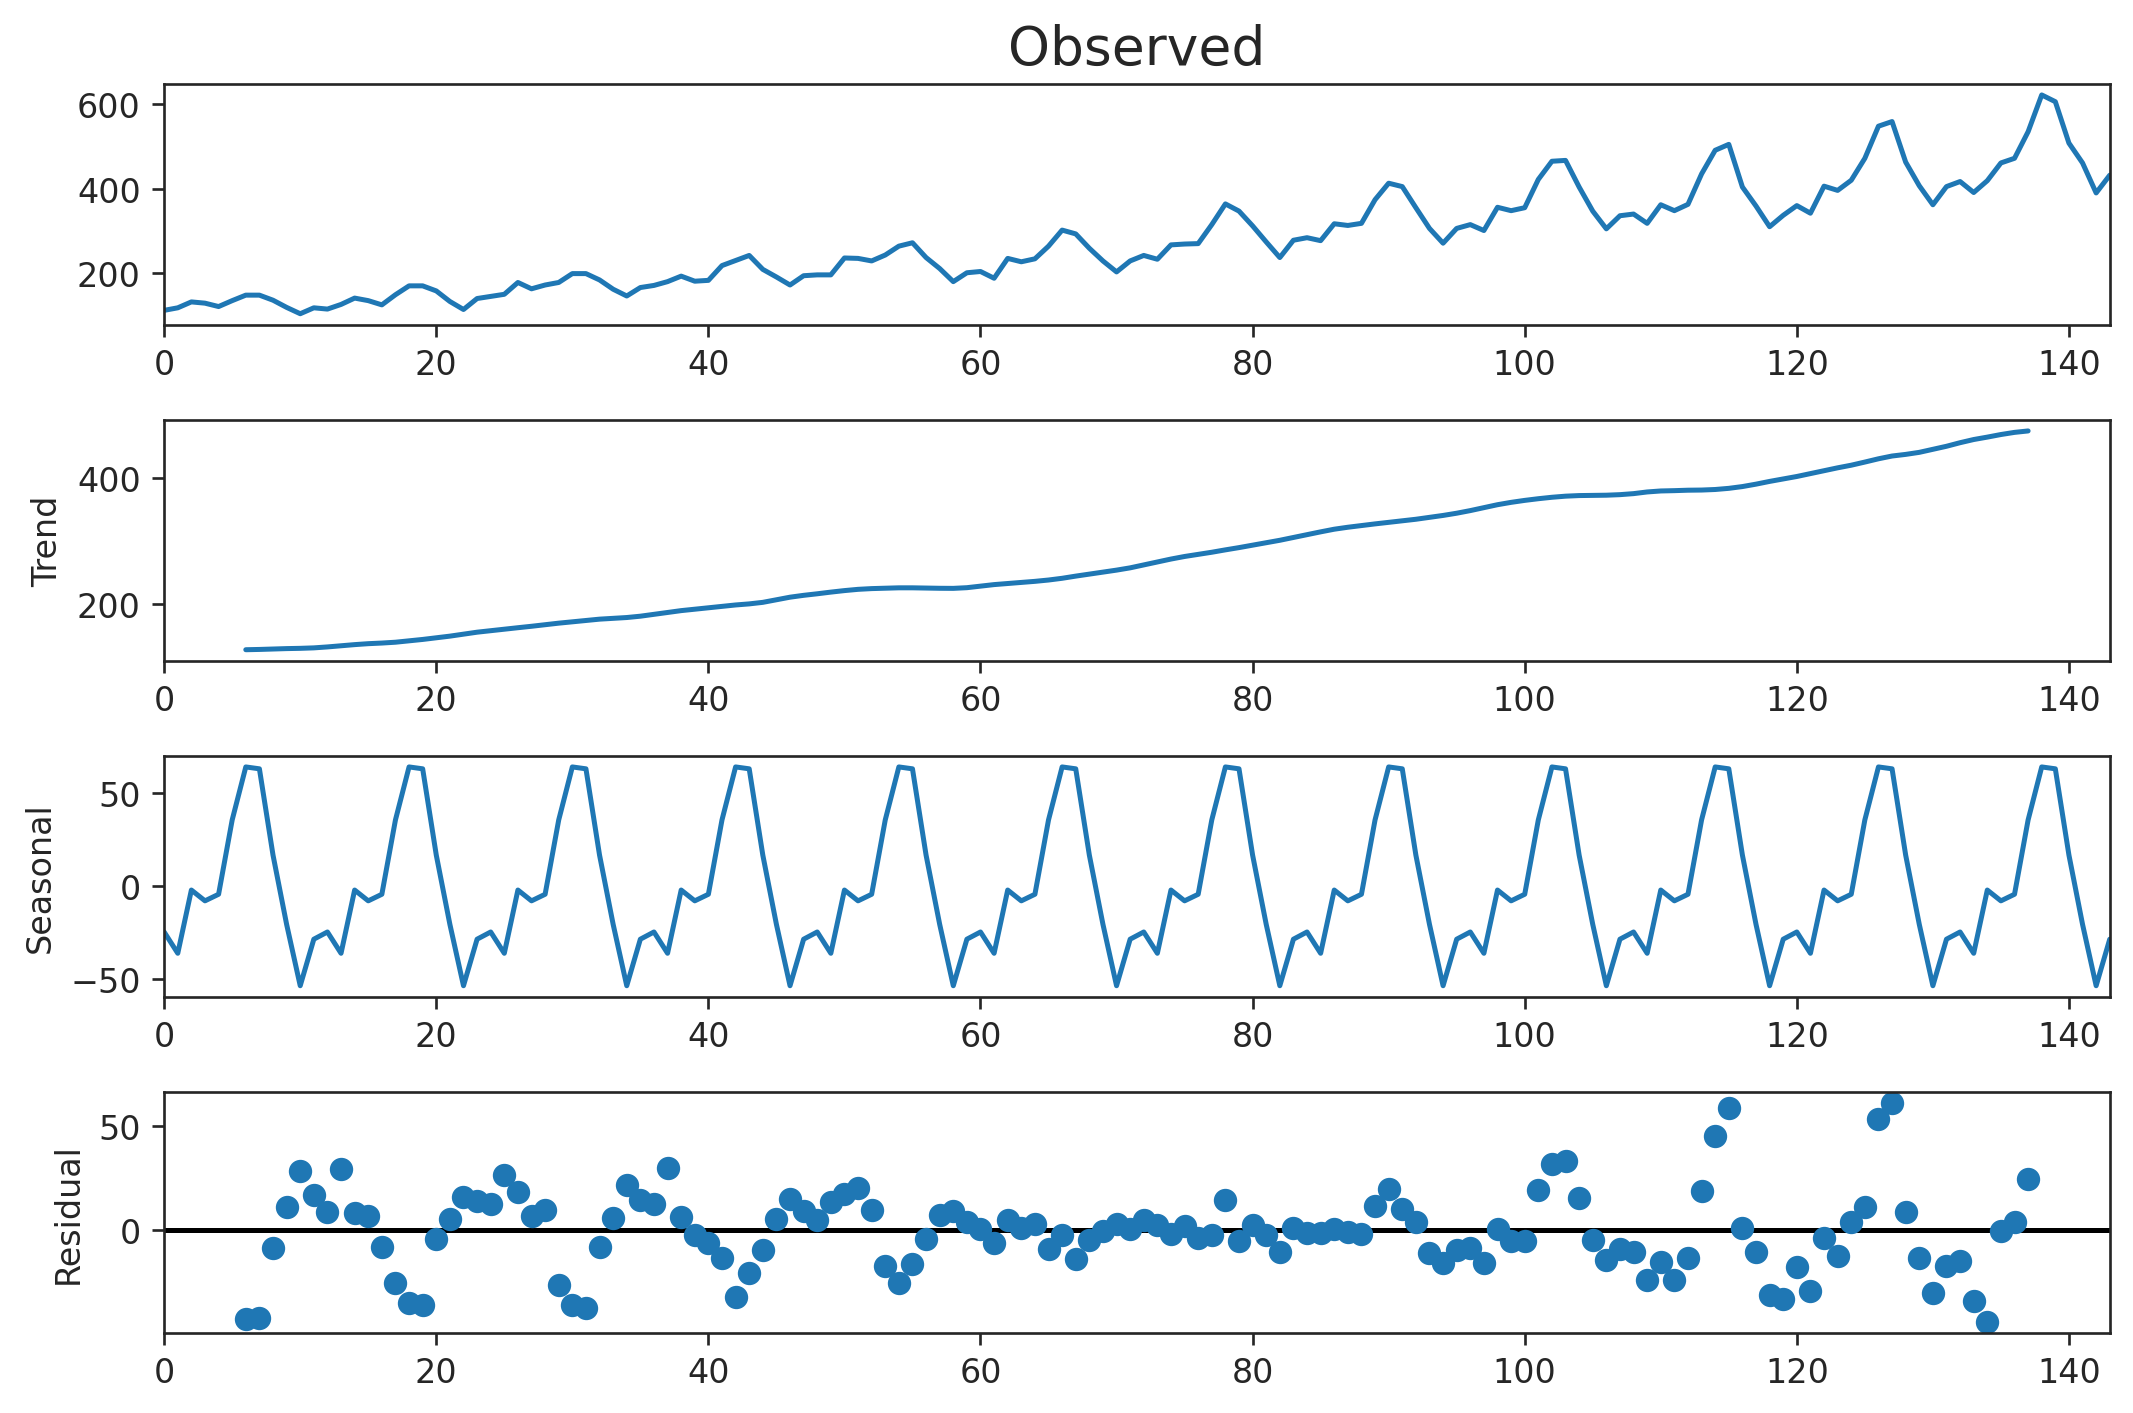

In [ ]:
result = seasonal_decompose(series.values,model='additive',period=12)
plt.rcParams['figure.figsize'] = [9.0,6.0]
result.plot()
plt.show()

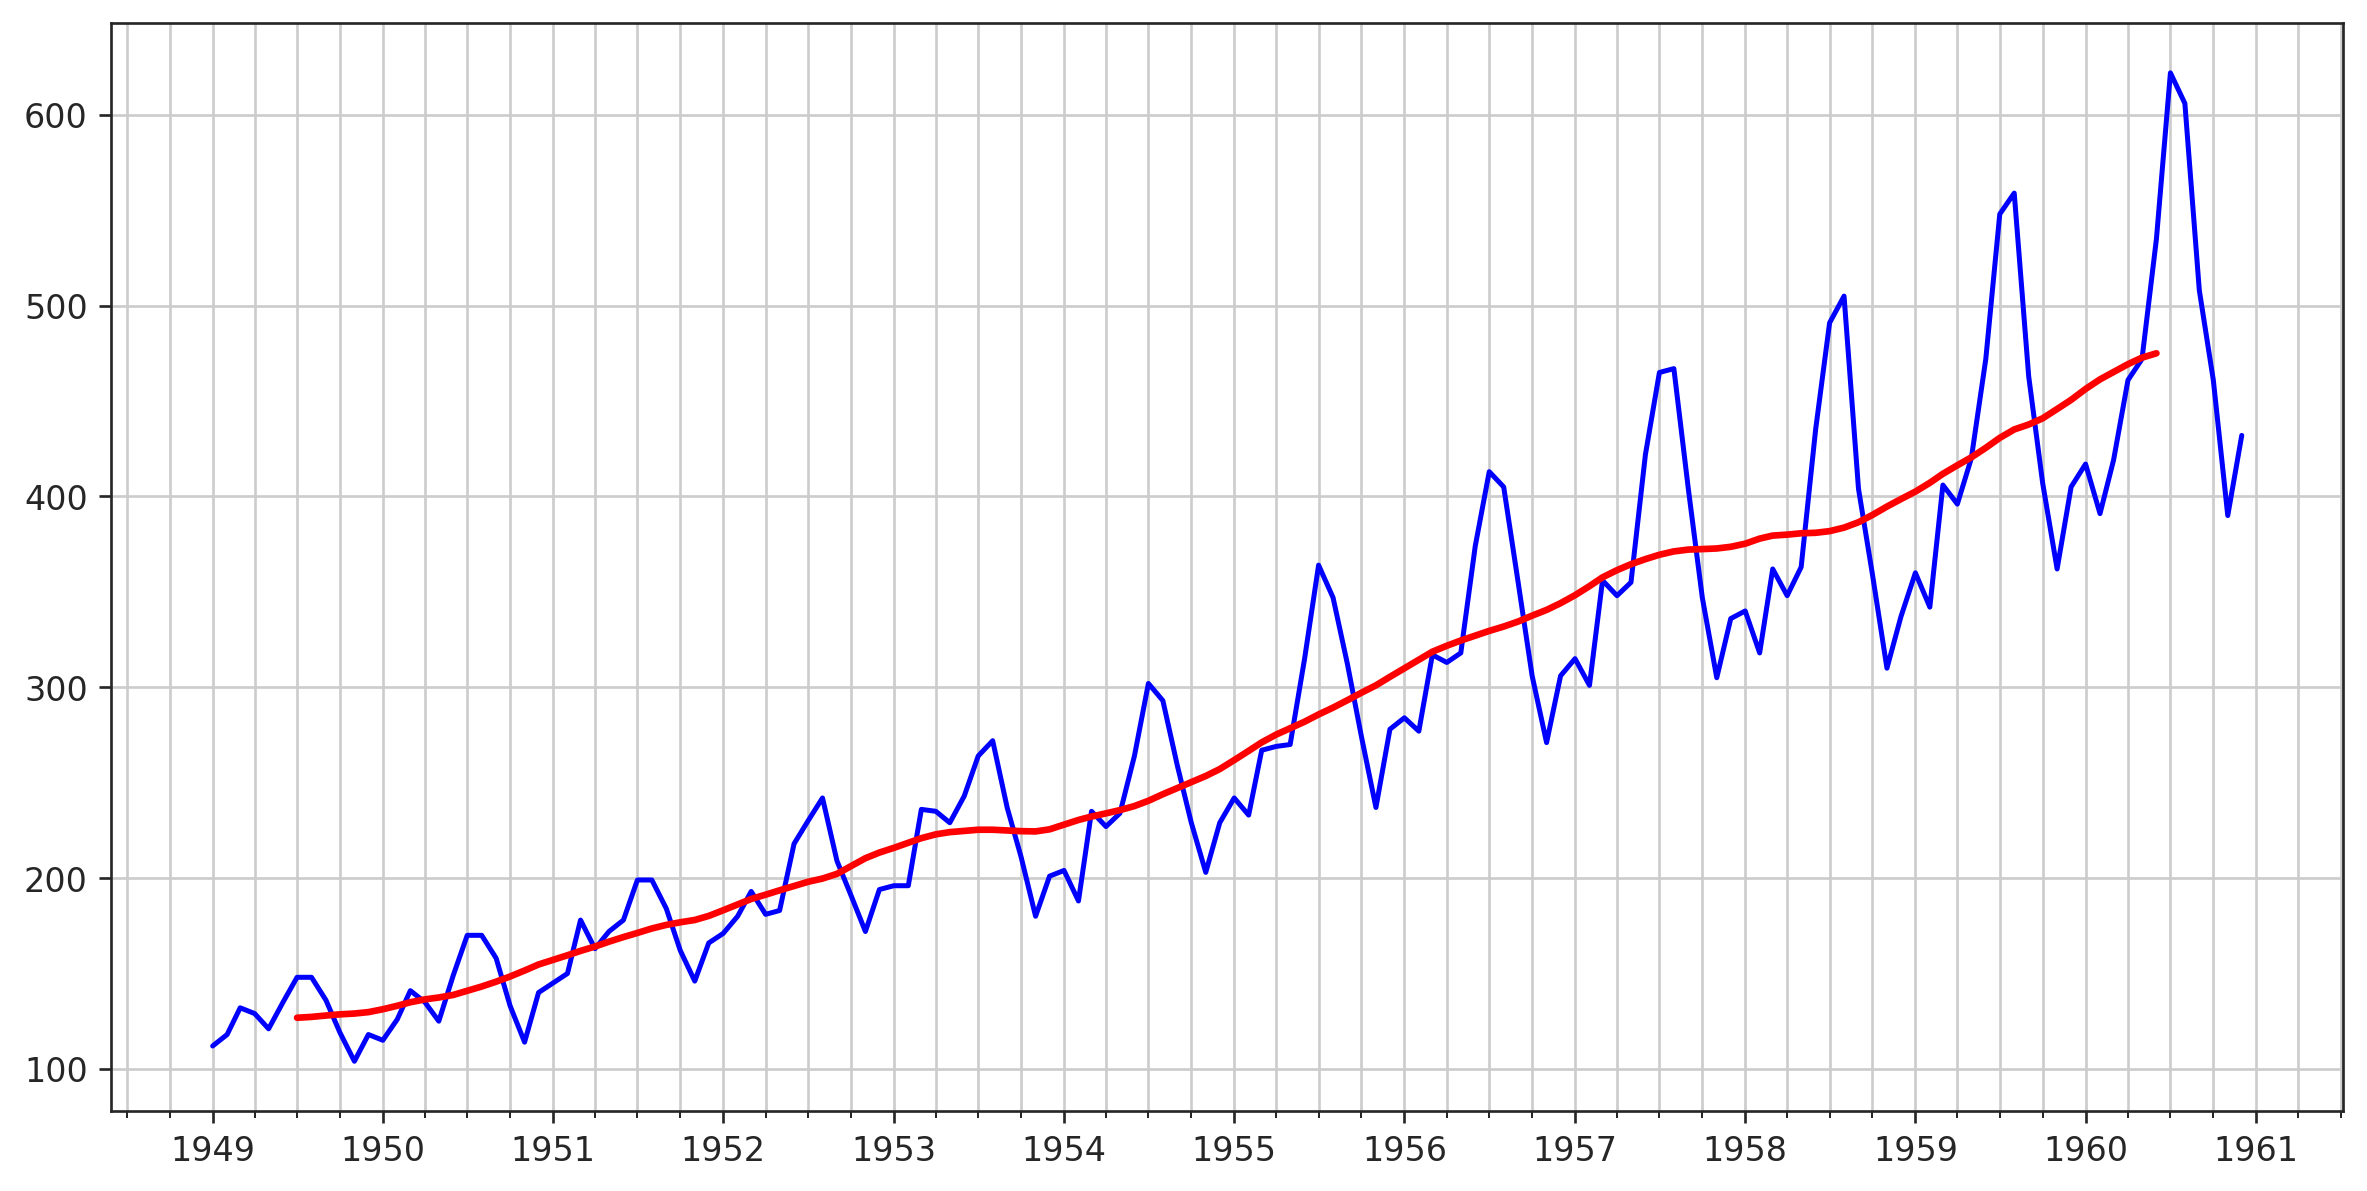

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12,6))
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(series.index, series['Passengers'], c='blue')
plt.plot(series.index, result.trend, c='red',lw=2)

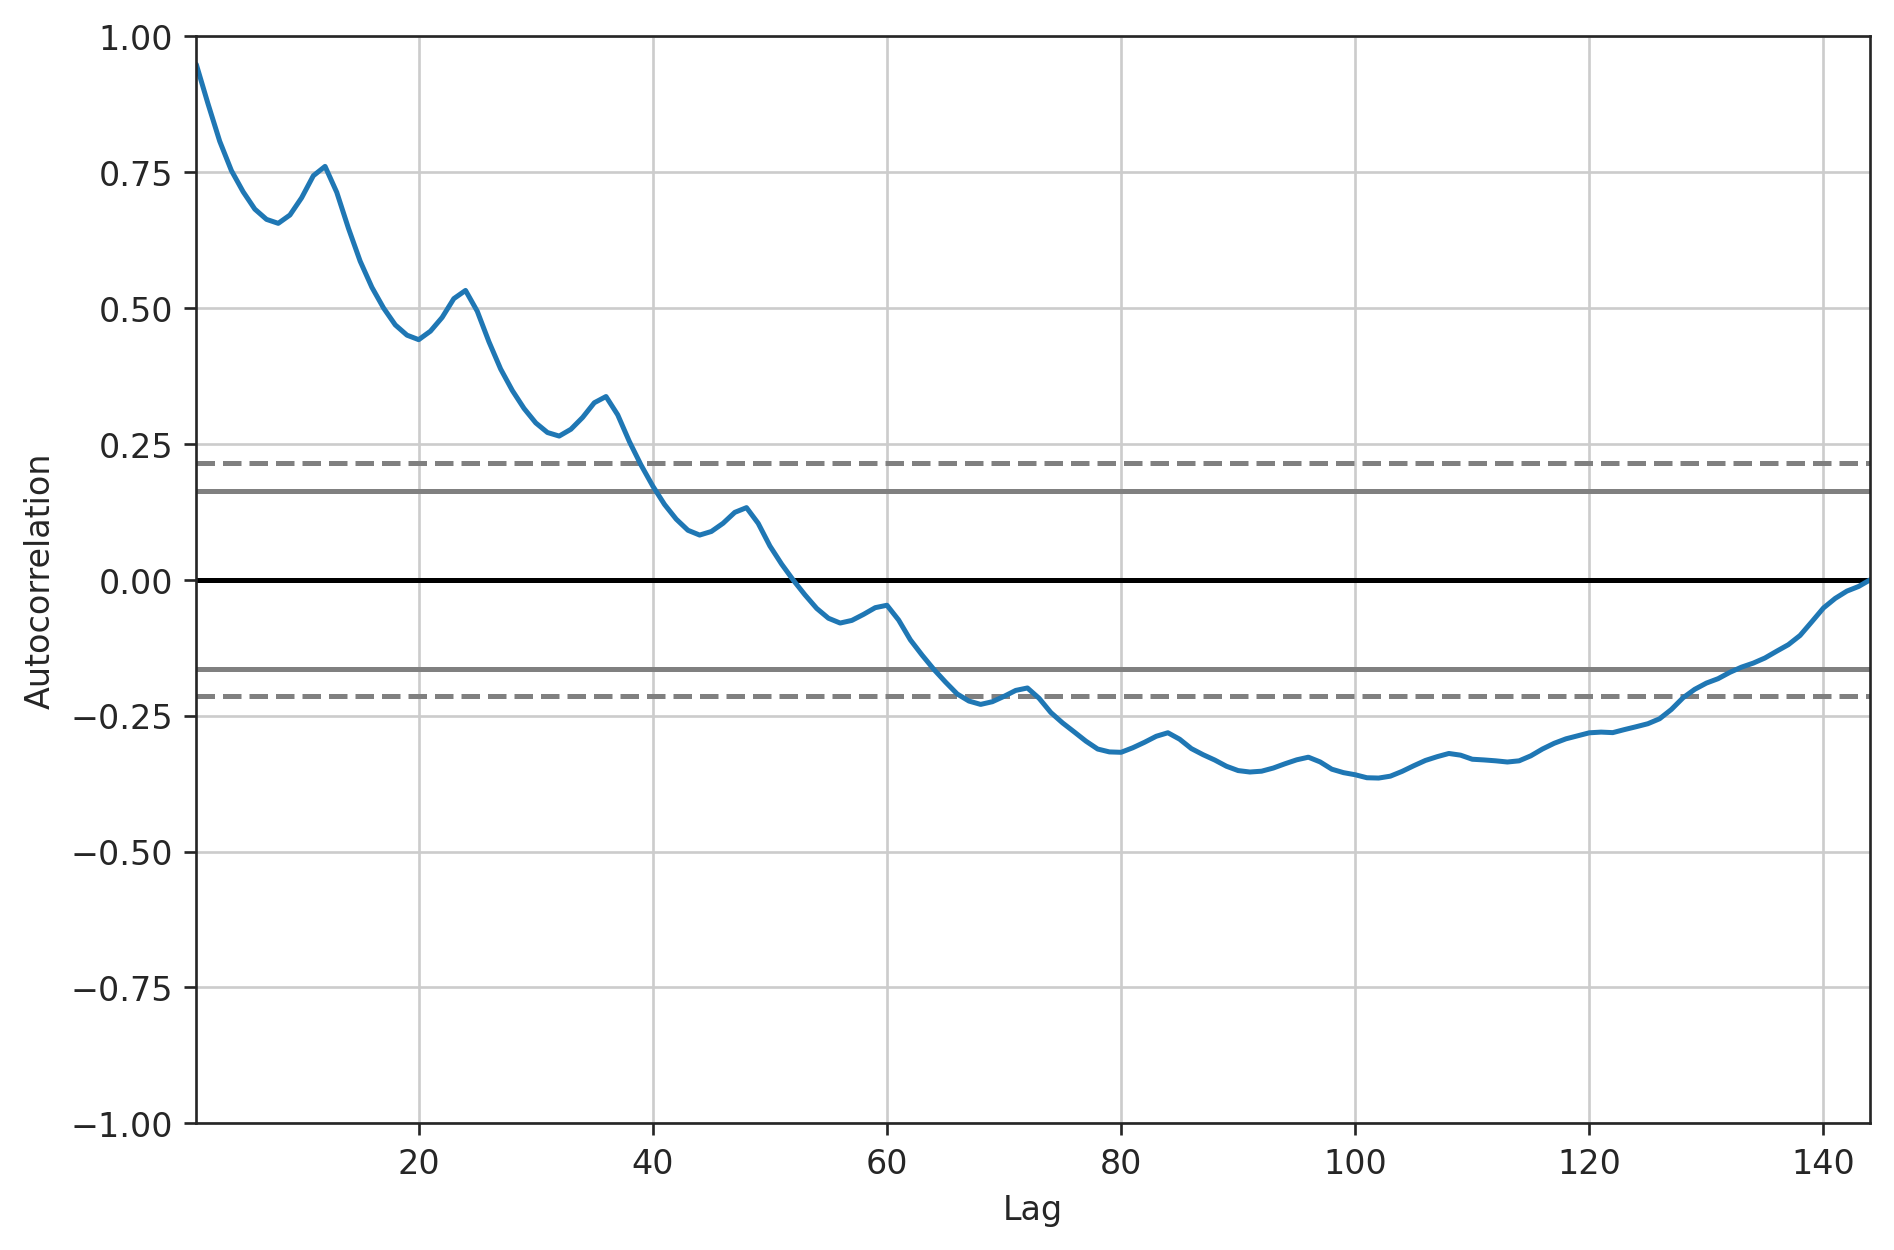

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error as mse
from pandas.plotting import autocorrelation_plot

mpl.rcParams['figure.dpi'] = 120
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(series)
plt.show()

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                ARIMA(12, 1, 2)   Log Likelihood                -558.390
Date:                Mon, 04 Apr 2022   AIC                           1146.781
Time:                        18:51:09   BIC                           1191.224
Sample:                    01-01-1949   HQIC                          1164.840
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1118      0.079      1.423      0.155      -0.042       0.266
ar.L2         -0.1260      0.091     -1.382      0.167      -0.305       0.053
ar.L3          0.0171      0.062      0.275      0.7

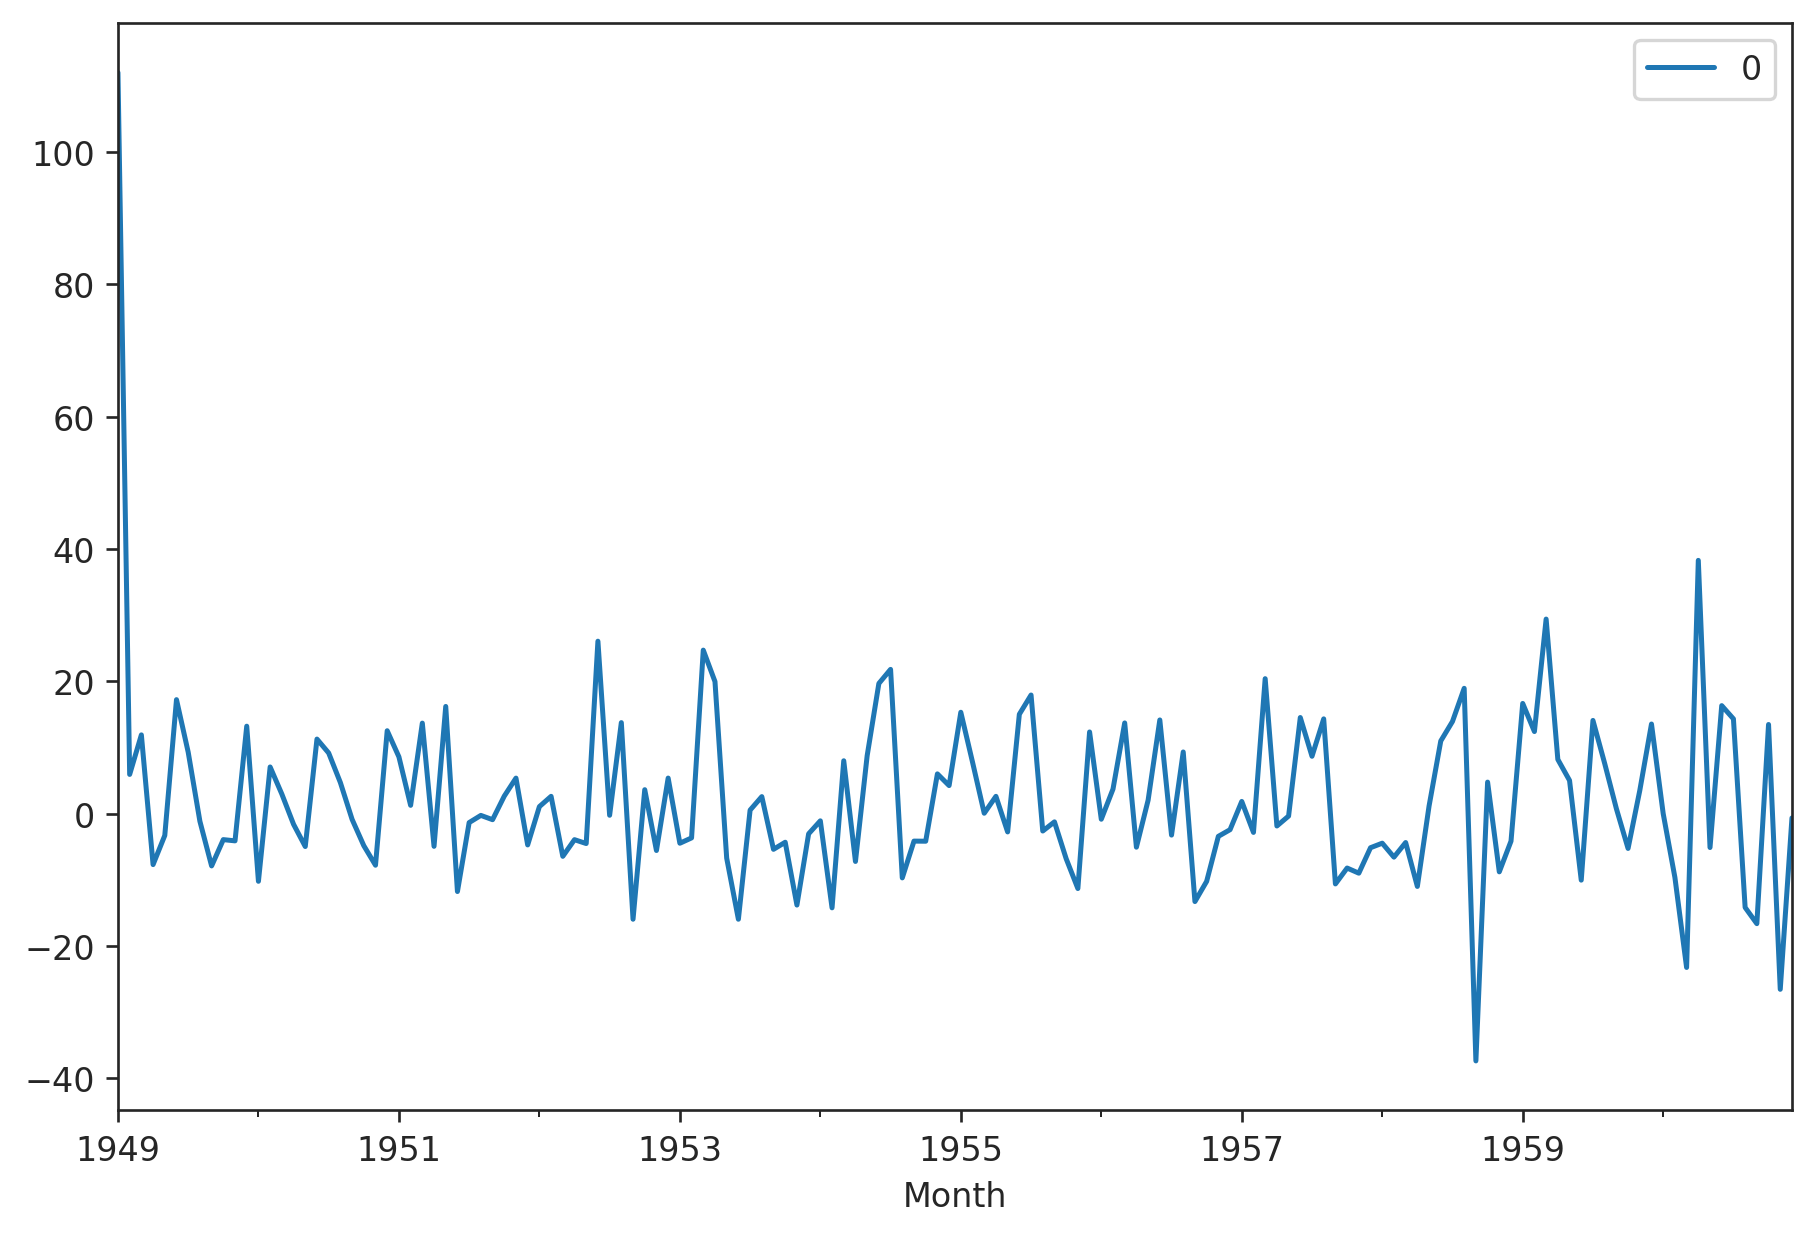

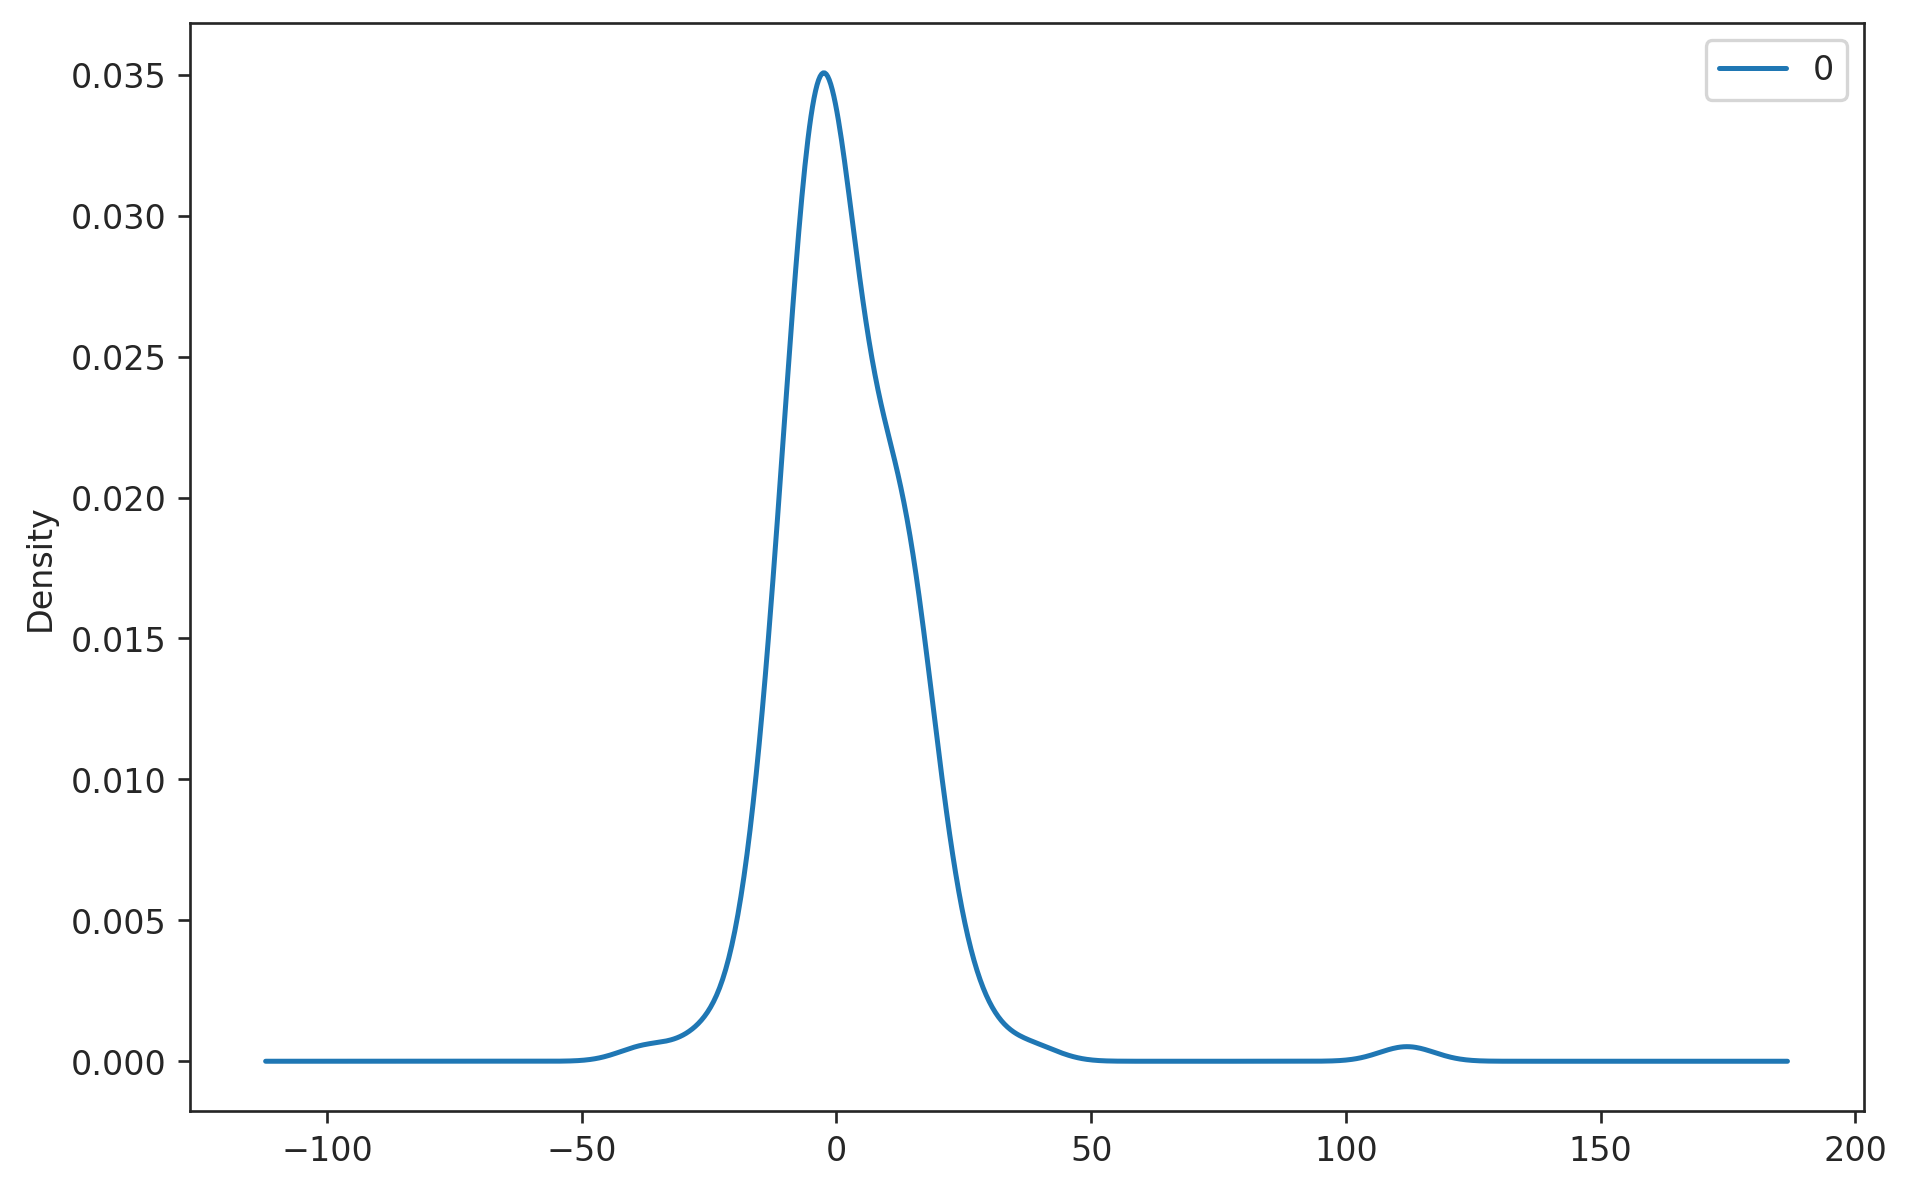

                0
count  144.000000
mean     2.403048
std     14.460998
min    -37.354441
25%     -4.981980
50%     -0.245122
75%      9.306935
max    112.000000


In [ ]:
import warnings
warnings.filterwarnings("ignore")

model = ARIMA(series, order=(12,1,2))
model_fit = model.fit()
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

## AN important idea is "heteroskedasticity" i.e. the variance of the dependent variable is increasing when the input variable (time) increases

In [ ]:
resid = residuals.values

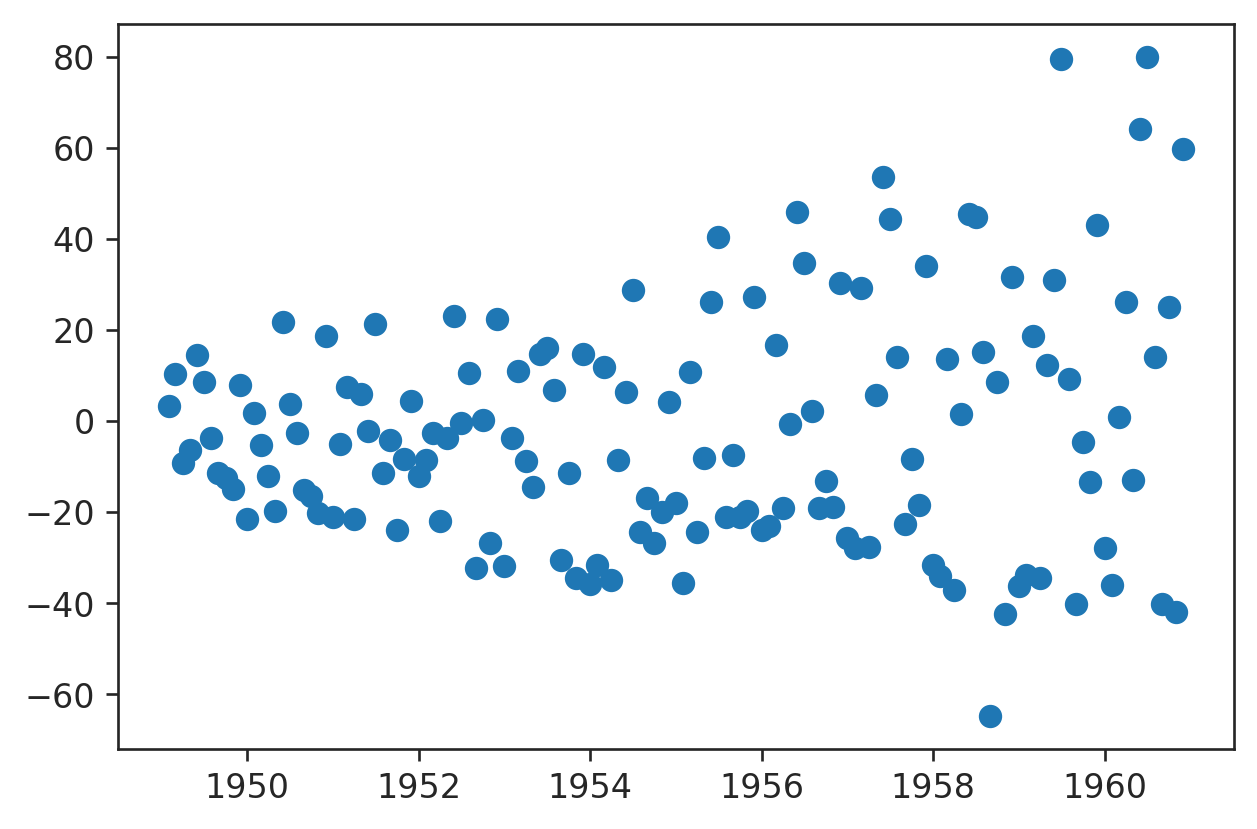

In [ ]:
fig,ax = plt.subplots(figsize=(6,4))
ax.scatter(residuals.index,resid)

In [ ]:
series = pd.read_csv('drive/MyDrive/Data Sets/penguins.csv')
series['Month'] = pd.to_datetime(series['Month'])
series

,Month,Number
0,2000-01-01,753
1,2000-02-01,448
2,2000-03-01,356
3,2000-04-01,504
4,2000-05-01,698
...,...,...
79,2006-08-01,301
80,2006-09-01,389
81,2006-10-01,624
82,2006-11-01,748


In [ ]:
series = series.set_index('Month')
series

,Number
Month,
2000-01-01,753
2000-02-01,448
2000-03-01,356
2000-04-01,504
2000-05-01,698
...,...
2006-08-01,301
2006-09-01,389
2006-10-01,624


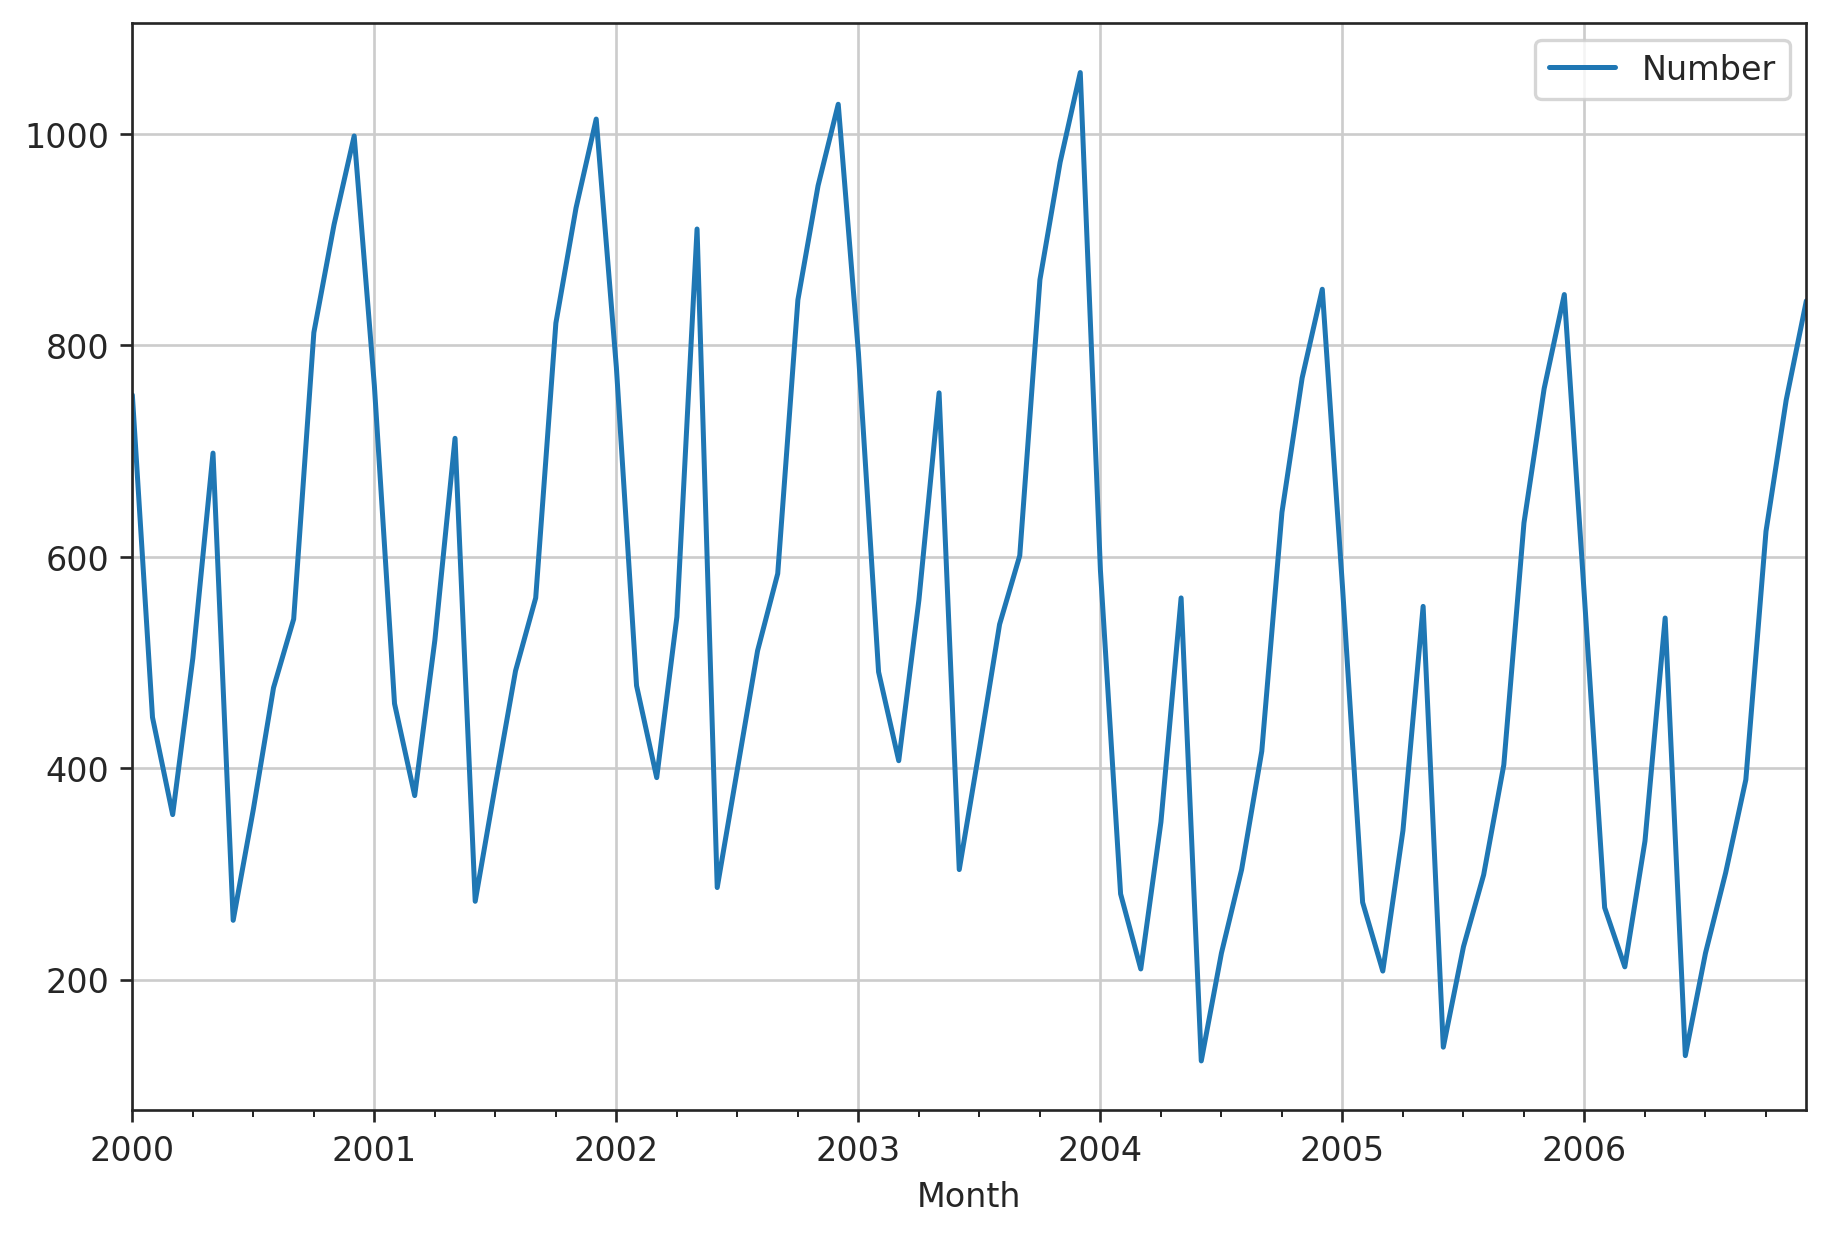

In [ ]:
series.plot(grid=True)

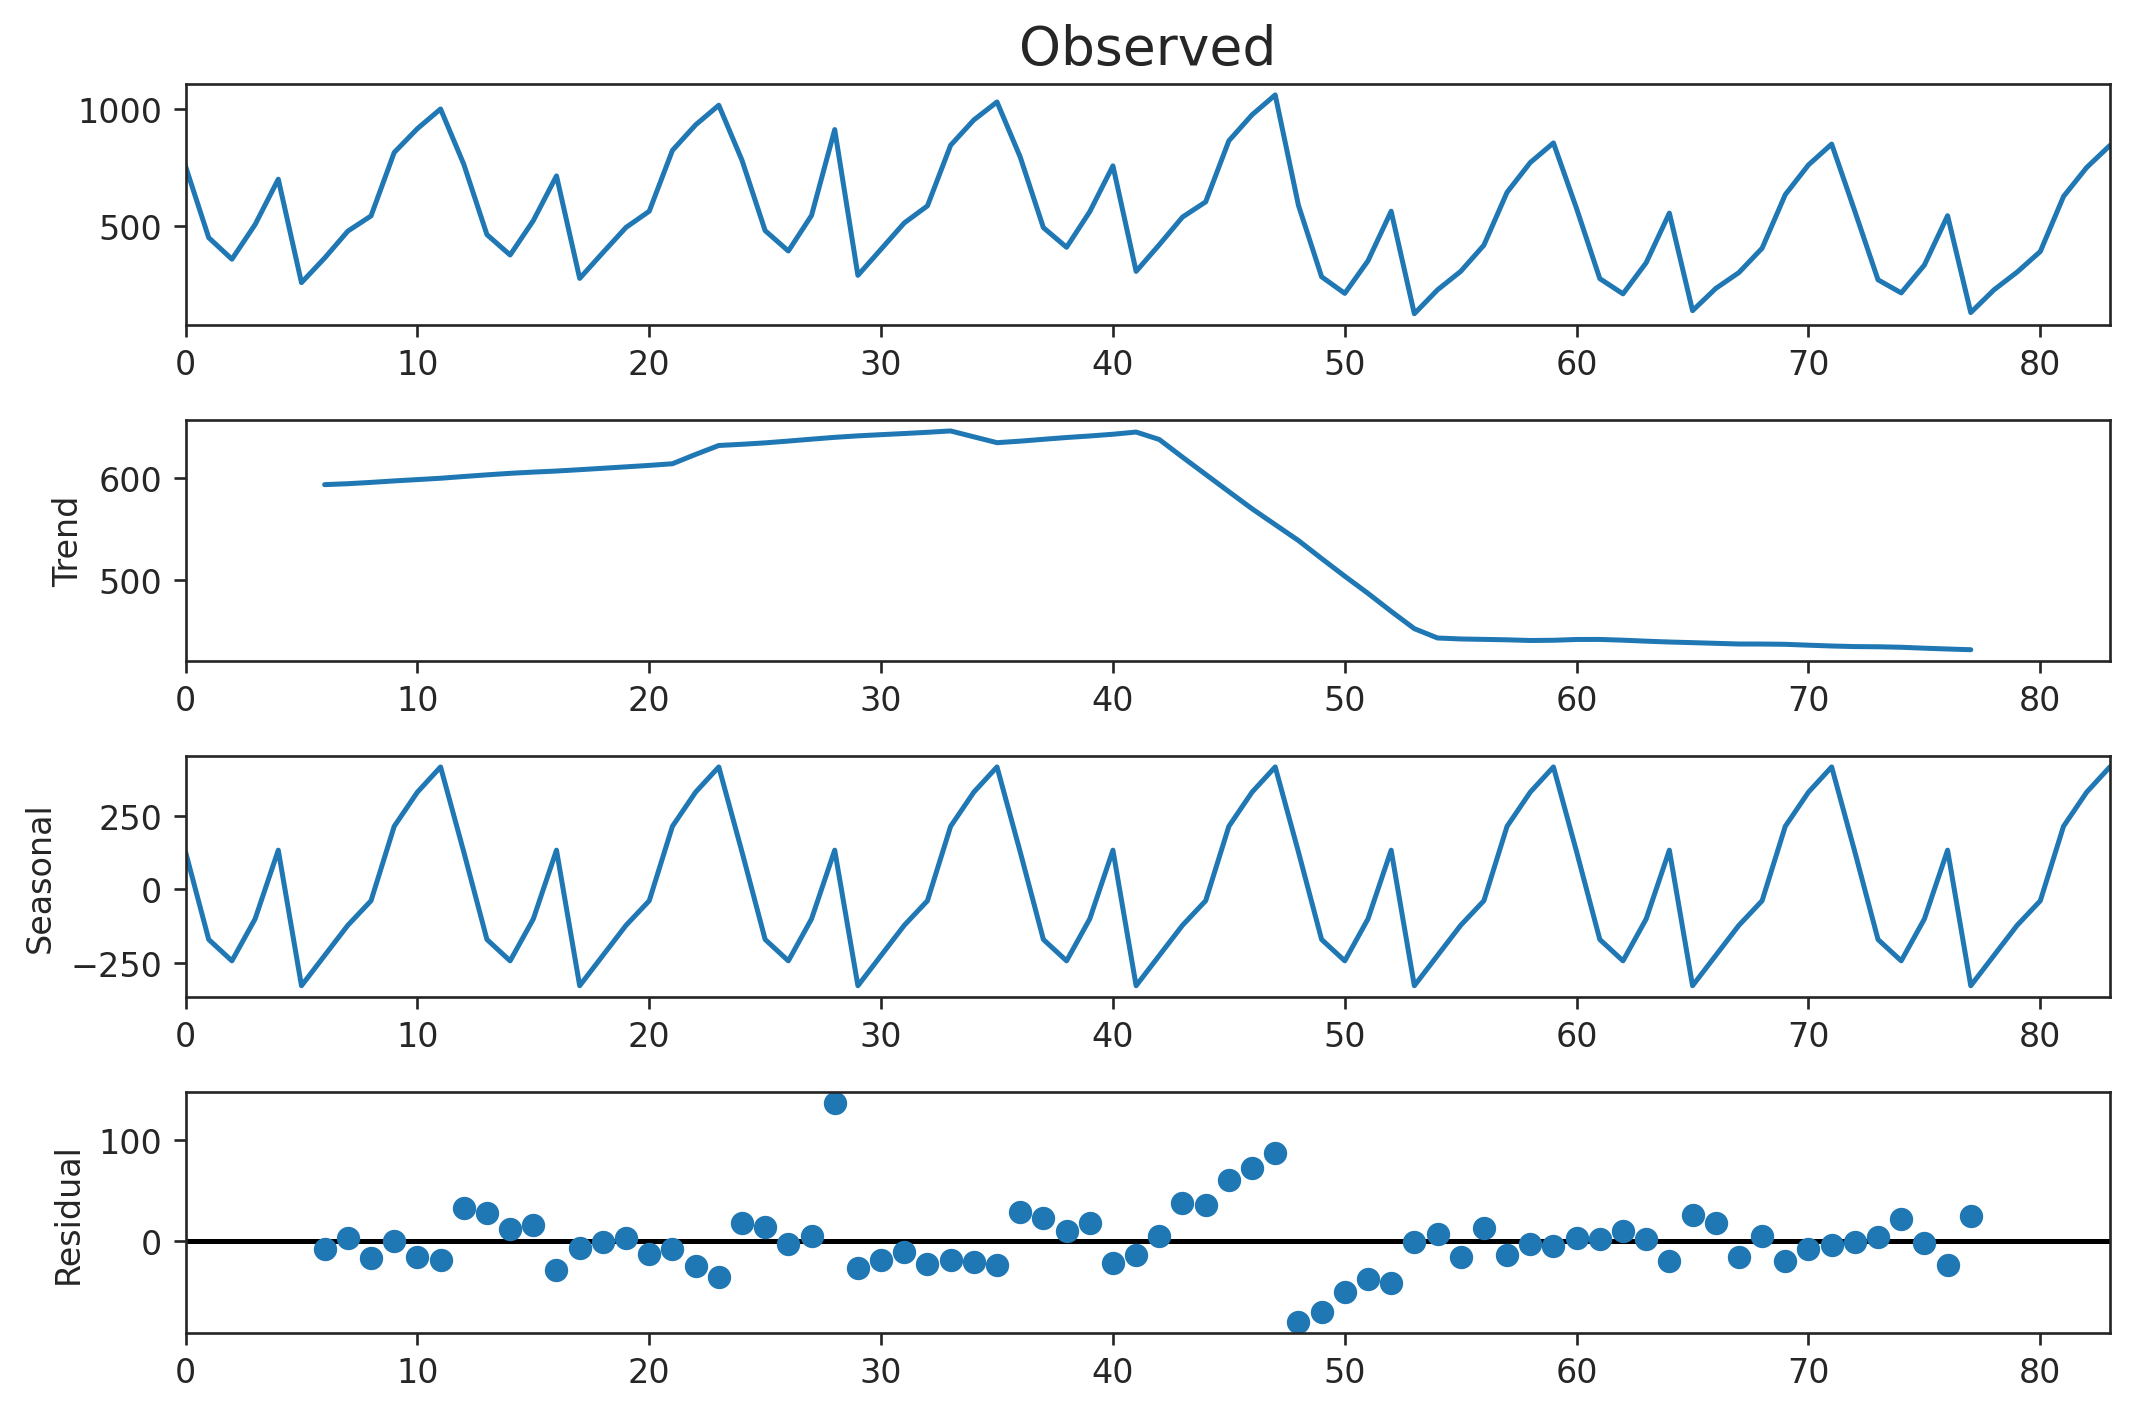

In [ ]:
result = seasonal_decompose(series.values,model='additive',freq=12)
plt.rcParams['figure.figsize'] = [9.0,6.0]
result.plot()
plt.show()

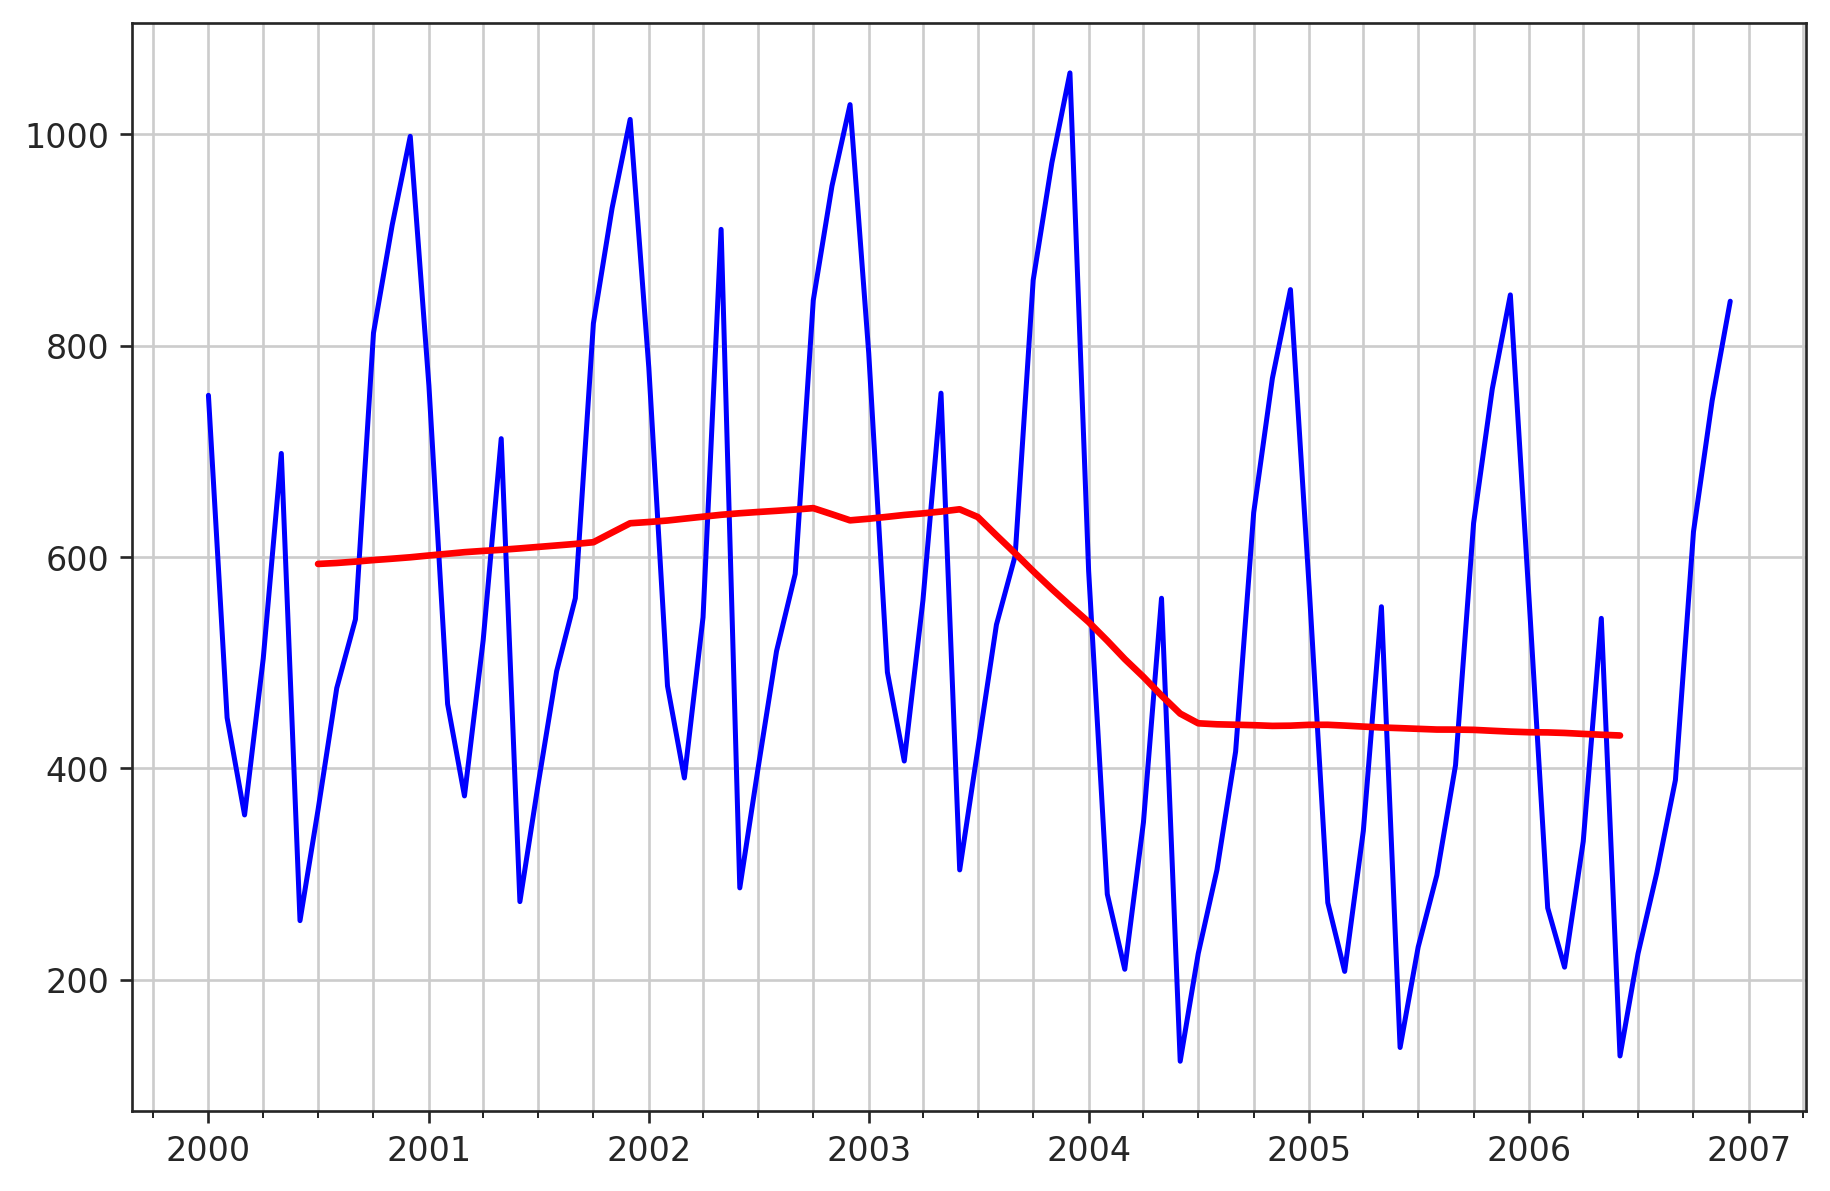

In [ ]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(series.index, series['Number'], c='blue')
plt.plot(series.index, result.trend, c='red',lw=2)

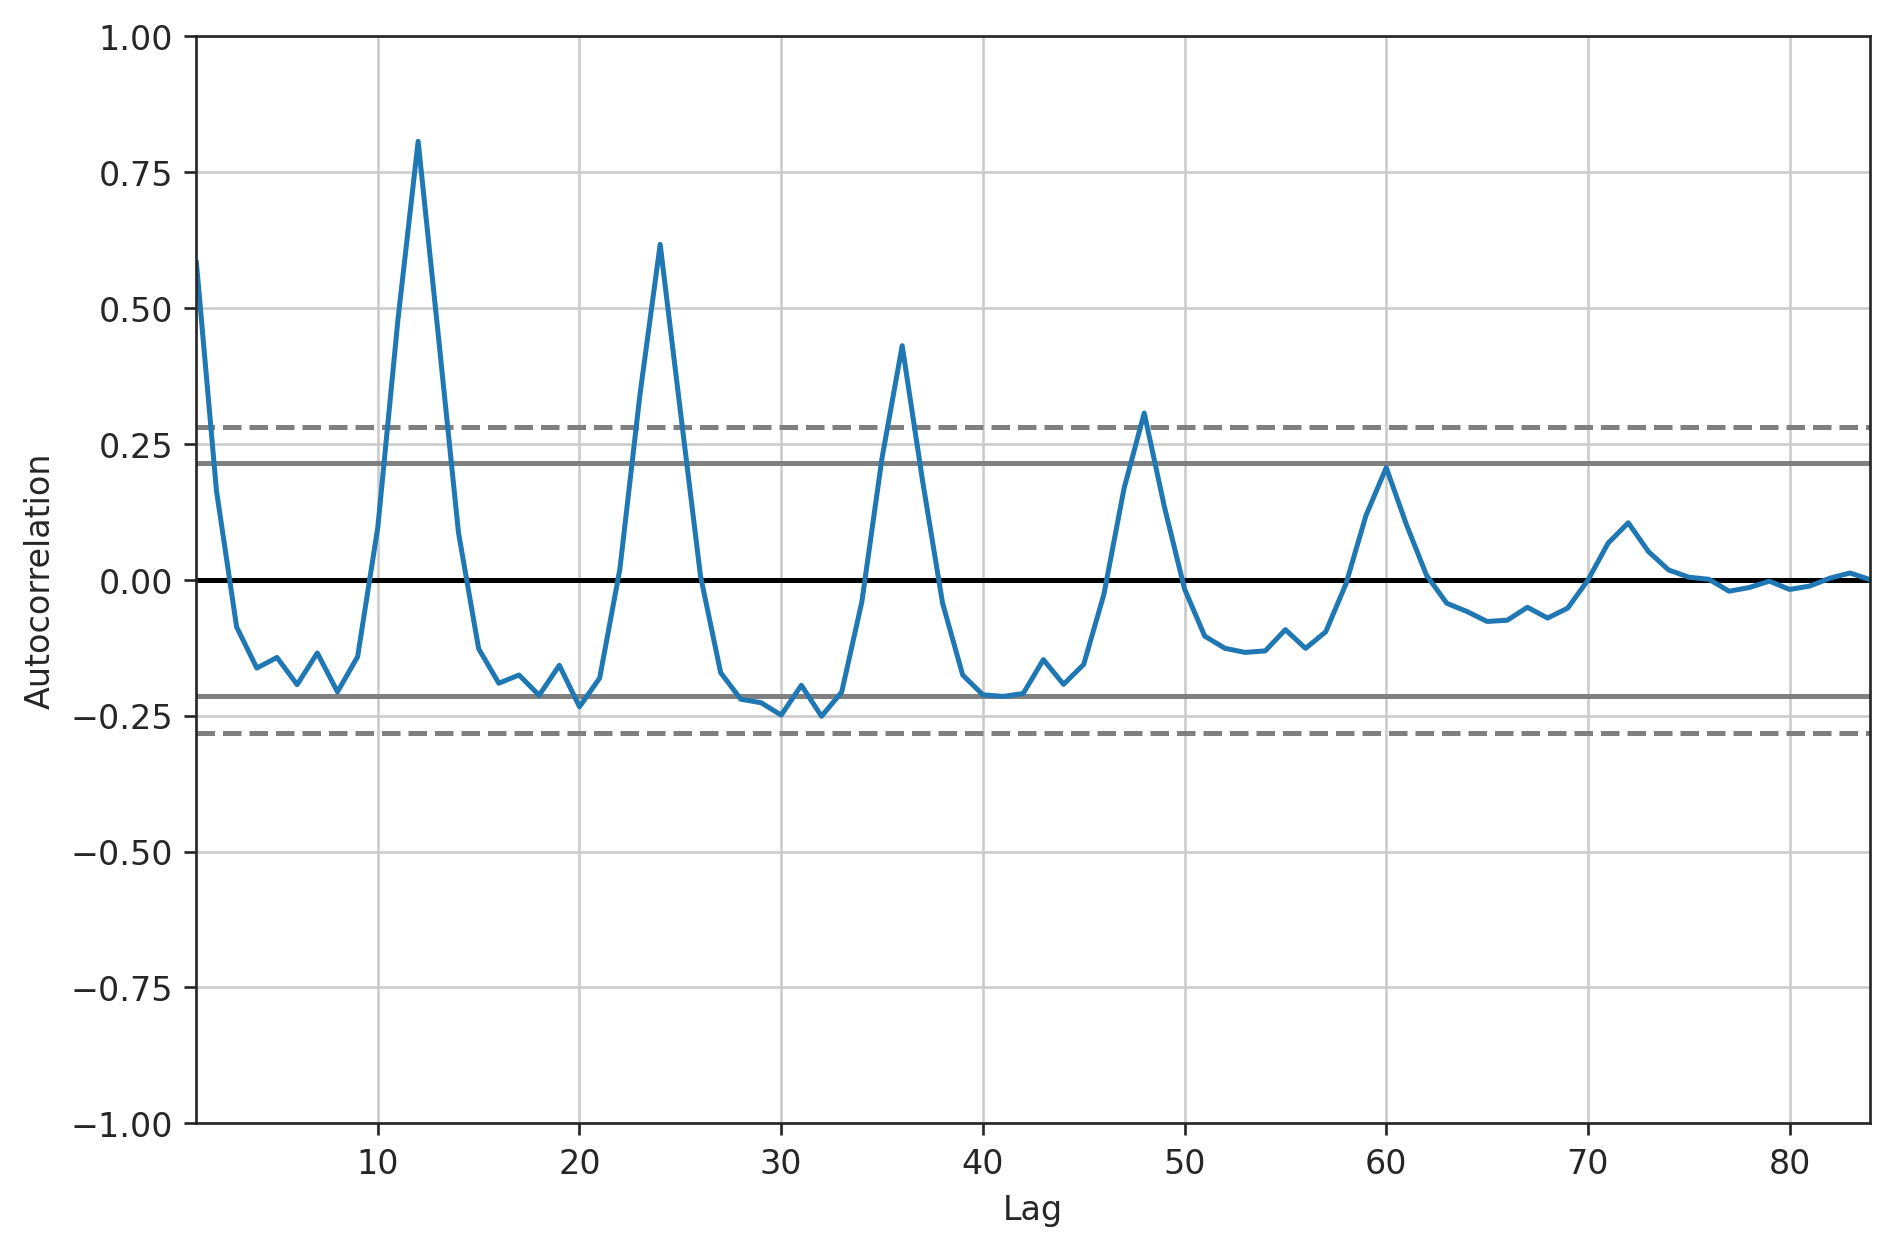

In [ ]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

autocorrelation_plot(series)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:               D.Number   No. Observations:                   83
Model:                ARIMA(12, 1, 1)   Log Likelihood                -458.442
Method:                       css-mle   S.D. of innovations             50.794
Date:                Mon, 29 Mar 2021   AIC                            946.883
Time:                        19:11:30   BIC                            983.166
Sample:                    02-01-2000   HQIC                           961.460
                         - 12-01-2006                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.8691      2.693     -0.694      0.488      -7.147       3.409
ar.L1.D.Number     -0.1021      0.075     -1.354      0.176      -0.250       0.046
ar.L2.D.Number     -0.1396      

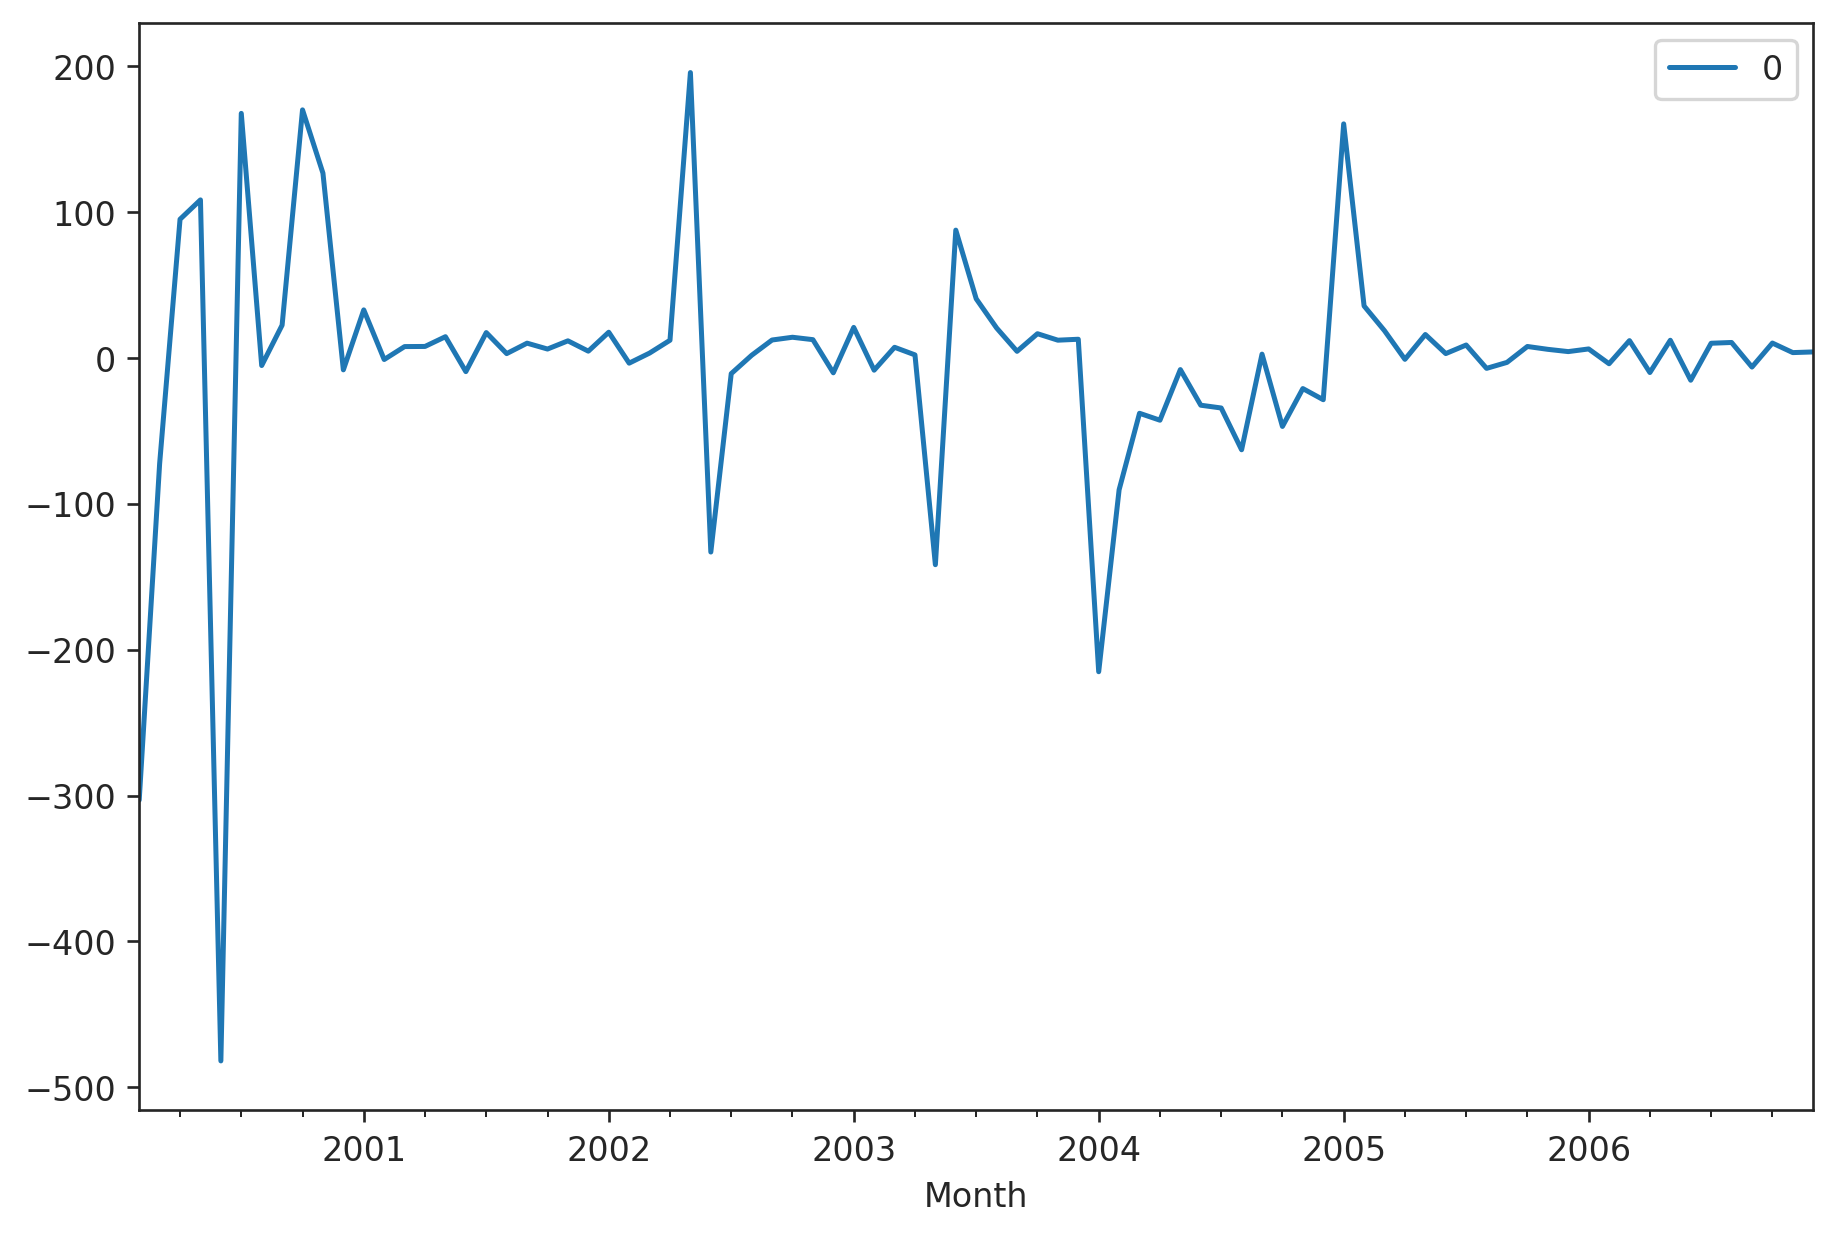

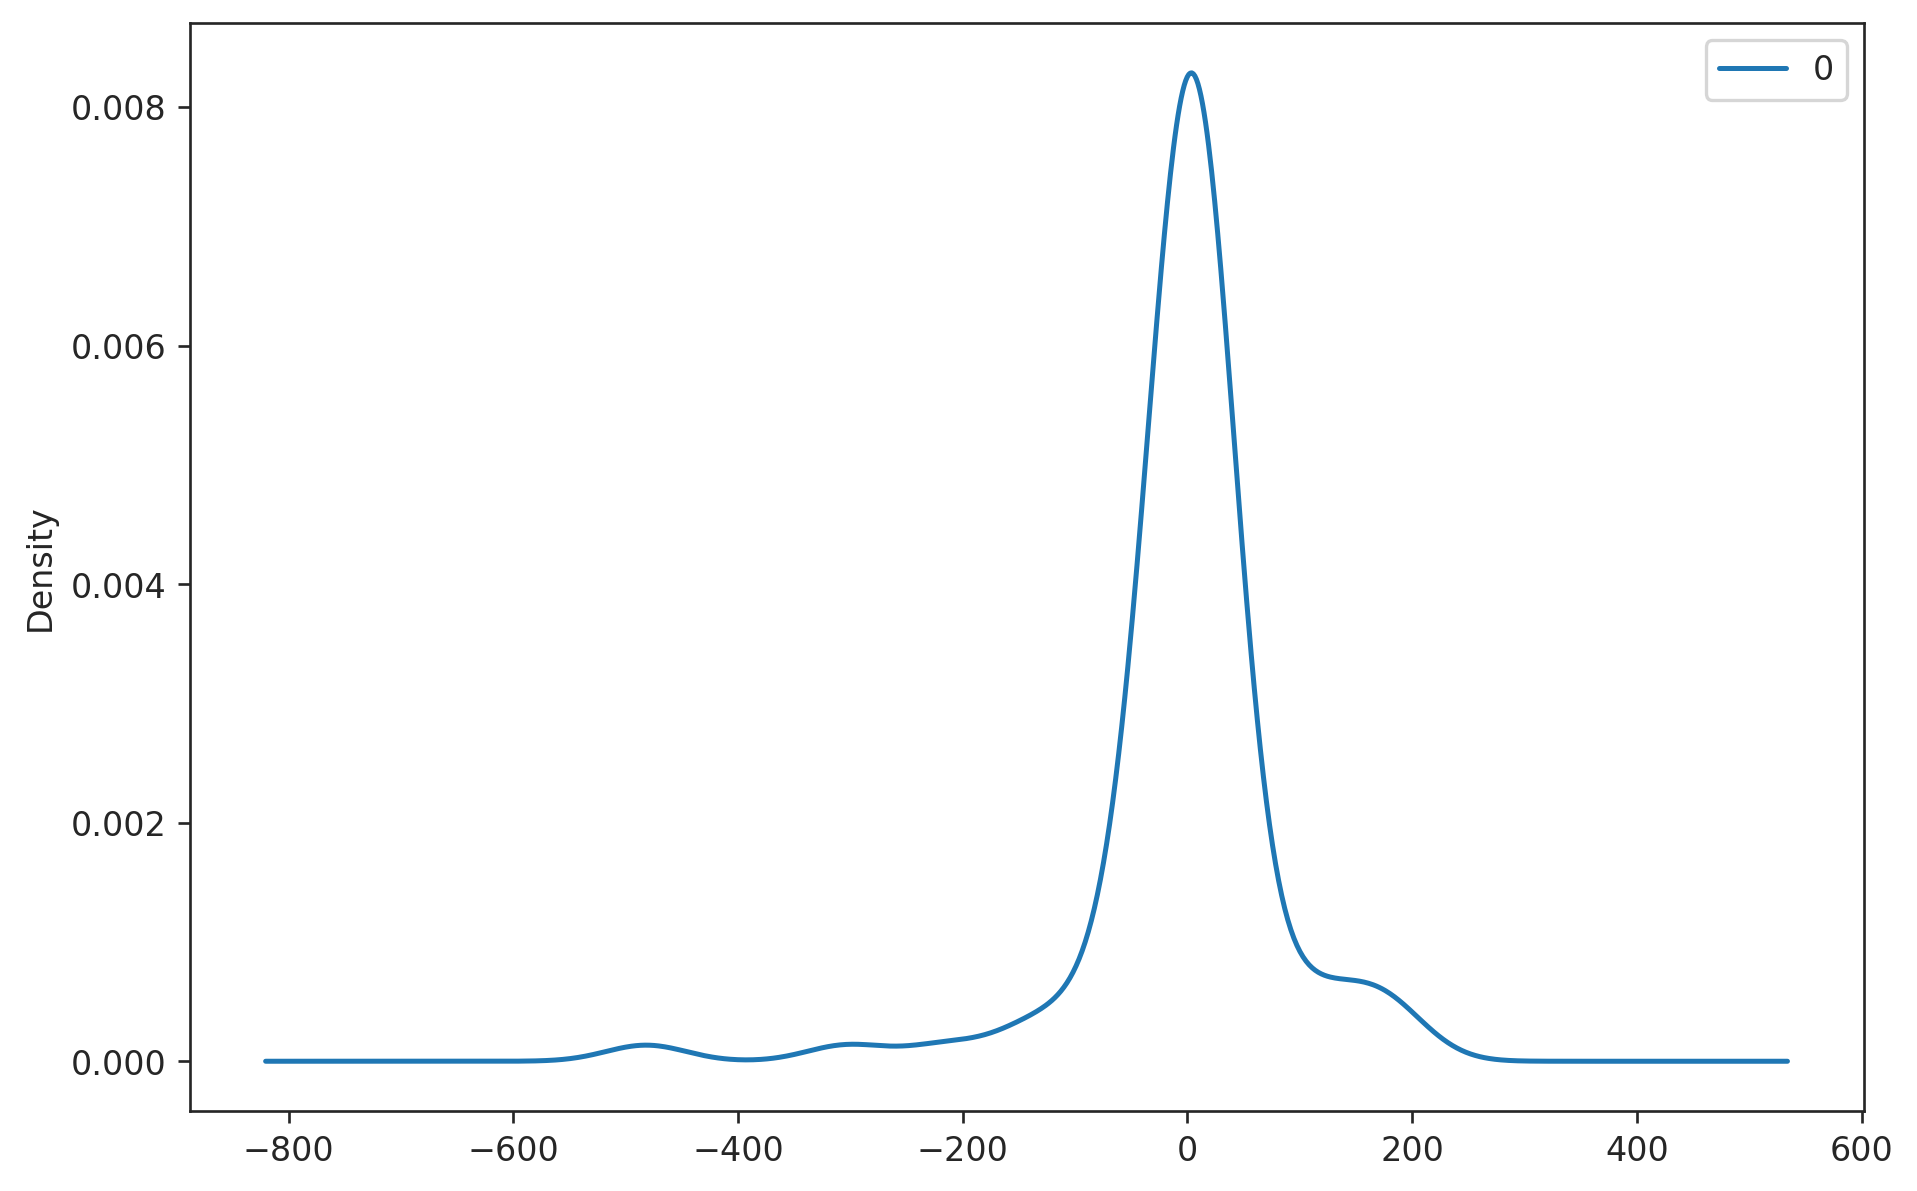

                0
count   83.000000
mean    -2.870062
std     86.200231
min   -481.844912
25%     -8.456473
50%      4.449817
75%     13.300742
max    195.353313


In [ ]:
model = ARIMA(series, order=(12,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())